## Загрузка необходимых библиотек

In [1]:
# импорт необходимых библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# считывание обучающего датасета

df_train = pd.read_csv('data/train_dataset_train.csv', index_col='id')
df_train.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
id,,,,,,,,,,,
1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [3]:
# считывание тестового датасета

df_test = pd.read_csv('data/test_dataset_test.csv', index_col='id')
df_test.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm
id,,,,,,,,,
1091022,425A13E16226CA01032043111488E0F5,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:03
1091023,F94EDC107A4E054786882F9453C1B93F,Пропуск FacePay,184,Молодёжная (Западный),3010,Молодёжная,3,Арбатско-Покровская,2022-09-12 05:00:45
1091024,8F13BFBA98A7DD34B11BD2DDCC5CA68E,СК студента 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:52
1091025,7B98691636EC418ABF6FEDDE4D7C68FC,КОШЕЛЕК,107,Сокол ( Южн./Вост. ),2018,Сокол,2,Замоскворецкая,2022-09-12 05:00:58
1091026,679C55C28CB36FB546FD104502C0B3DB,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:39


In [4]:
# вывод информации о данных

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091021 entries, 1 to 1091021
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ticket_id       1091021 non-null  object 
 1   ticket_type_nm  1091021 non-null  object 
 2   entrance_id     1091021 non-null  int64  
 3   entrance_nm     1091021 non-null  object 
 4   station_id      1091021 non-null  int64  
 5   station_nm      1091021 non-null  object 
 6   line_id         1091021 non-null  int64  
 7   line_nm         1091021 non-null  object 
 8   pass_dttm       1091021 non-null  object 
 9   time_to_under   1091021 non-null  float64
 10  label           1091021 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 99.9+ MB


Все признаки являются категориальными за исключением времени суток

In [5]:
# проверка на наличие пропусков

df_train.isna().sum()

ticket_id         0
ticket_type_nm    0
entrance_id       0
entrance_nm       0
station_id        0
station_nm        0
line_id           0
line_nm           0
pass_dttm         0
time_to_under     0
label             0
dtype: int64

In [6]:
# вывод информации о данных

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561890 entries, 1091022 to 1652911
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ticket_id       561890 non-null  object
 1   ticket_type_nm  561890 non-null  object
 2   entrance_id     561890 non-null  int64 
 3   entrance_nm     561890 non-null  object
 4   station_id      561890 non-null  int64 
 5   station_nm      561890 non-null  object
 6   line_id         561890 non-null  int64 
 7   line_nm         561890 non-null  object
 8   pass_dttm       561890 non-null  object
dtypes: int64(3), object(6)
memory usage: 42.9+ MB


In [7]:
# проверка на наличие пропусков

df_test.isna().sum()

ticket_id         0
ticket_type_nm    0
entrance_id       0
entrance_nm       0
station_id        0
station_nm        0
line_id           0
line_nm           0
pass_dttm         0
dtype: int64

## Проверка взаимосвязи признаков

In [8]:
# вычисление корреляции признаков

df_train_corr = df_train.corr()

C:\Users\rus_k\AppData\Local\Temp\ipykernel_2972\768058320.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))


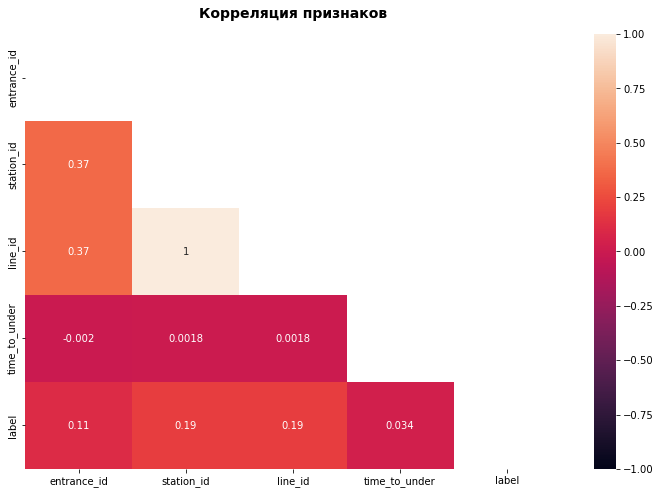

In [9]:
# визуализация корреляции признаков

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))
df_train_corr_heatmap = sns.heatmap(df_train_corr, mask=mask, vmin=-1, vmax=1, annot=True)
df_train_corr_heatmap.set_title('Корреляция признаков', fontweight='bold', fontdict={'fontsize':14}, pad=16)
plt.show()

Выявлена связь признаков станции метро и линии на котой она распологается.

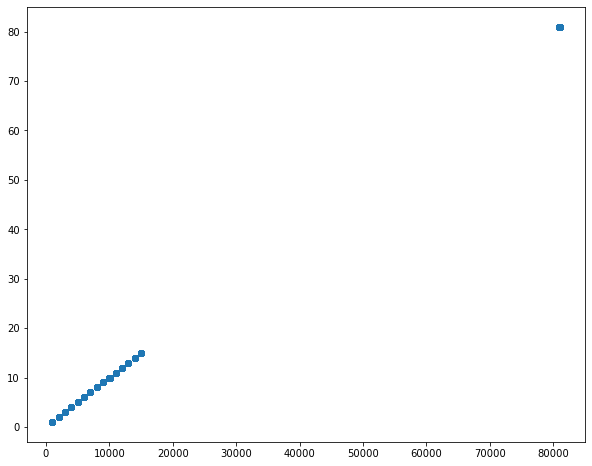

In [10]:
# визуализация взаимосвязи признаков станции метро и линии на которой она распологается

plt.figure(figsize=(10, 8))
plt.scatter(df_train['station_id'], df_train['line_id'])
plt.show()

## Анализ предсказываемого признака 'label' и 'time_to_under'

In [8]:
# количество уникальных значений

df_train['label'].nunique()

276

Количество уникальных значений предсказываемого значения очень велико, в связи с чем возникают трудности дальнейшего анализа взаимосвязи с признаками данных.

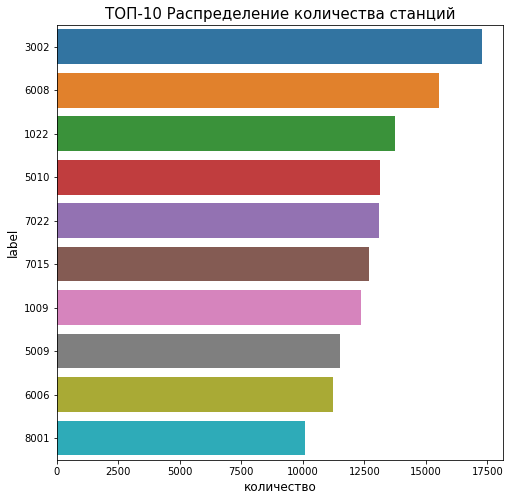

In [11]:
# визуализация количества ТОП-10 станций

plt.figure(figsize=(8,8))
sns.countplot(y = 'label', order=df_train['label'].value_counts().iloc[:10].index, data = df_train) \
.set_title('ТОП-10 Распределение количества станций', fontsize=15)
plt.xlabel('количество', fontsize=12)
plt.ylabel('label', fontsize=12)
plt.show()

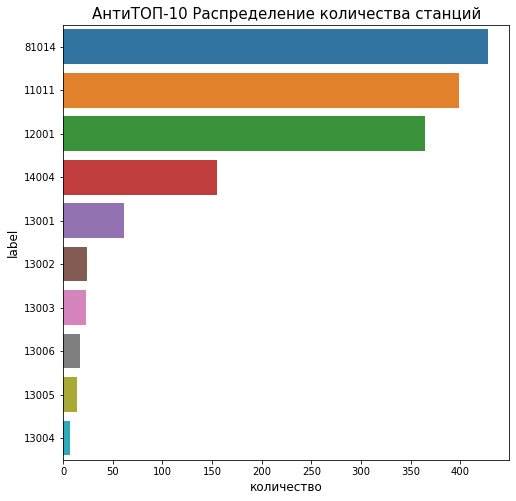

In [10]:
# визуализация АнтиТОП-10 станций

plt.figure(figsize=(8,8))
sns.countplot(y = 'label', order=df_train['label'].value_counts().iloc[-10:].index, data = df_train) \
.set_title('АнтиТОП-10 Распределение количества станций', fontsize=15)
plt.xlabel('количество', fontsize=12)
plt.ylabel('label', fontsize=12)
plt.show()

Присутствует явный дисбаланс предсказываемых классов. При предсказании необходимо будет провести балансировку данных

In [9]:
# вывод данных

df_train.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
id,,,,,,,,,,,
1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [13]:
# самая популярная станция очередного захода в метро

df_train['label'].value_counts().index[0]

3002

In [14]:
# выборка данных по станции

df_3002 = df_train.query('label == 3002')
df_3002.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
id,,,,,,,,,,,
61,764D546455E294FF9ACFB1A863A10E4B,Социальная карта жителя Моск. области,218,Новогиреево (Восточный),8003,Новогиреево,8,Калининская,2022-09-12 05:22:19,677.233333,3002
234,08C38EBE7D5FE076740767D284BC9461,90 дней ЕДИНЫЙ ТК,221,Перово (Восточный),8005,Перово,8,Калининская,2022-09-12 05:28:54,706.883333,3002
308,F13C0CD1665DC19E1344C679EDE629B3,30 дней ЕДИНЫЙ ТК,2227,Селигерская (Второй),10018,Селигерская,10,Люблинско-Дмитровская,2022-09-12 05:29:53,792.900000,3002
421,775F417B46D967439A38F3309F9F297C,30 дней ЕДИНЫЙ ТК,730,Дубровка,10007,Дубровка,10,Люблинско-Дмитровская,2022-09-12 05:30:24,290.266667,3002
527,402E9F04DAA4F79487D870516DE00CB5,КОШЕЛЕК,343,Сходненская (Первый),7018,Сходненская,7,Таганско-Краснопресненская,2022-09-12 05:30:53,829.166667,3002


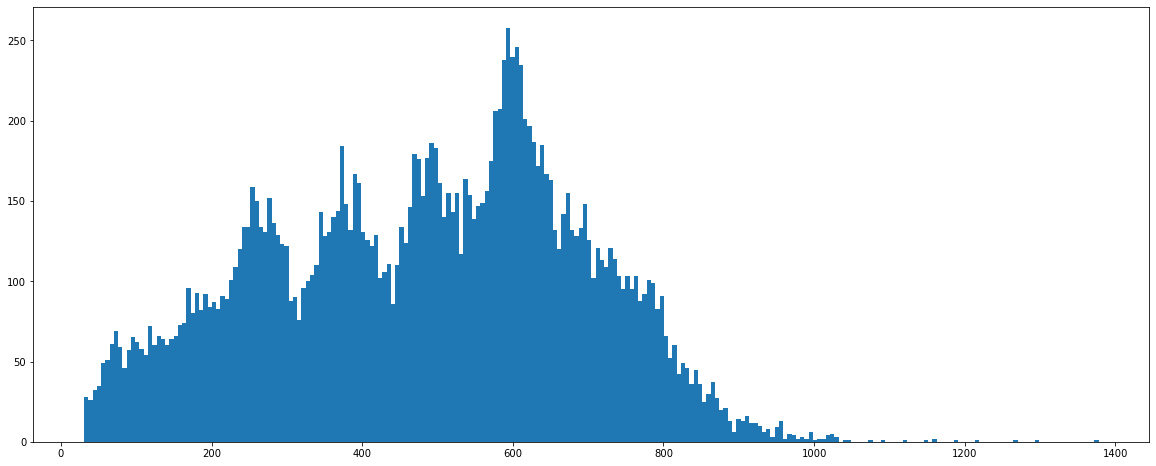

In [15]:
# визуализация распределения значений предсказываемого признака

plt.figure(figsize=(20,8))
plt.hist(df_3002['time_to_under'], bins=df_3002['station_id'].nunique())
plt.show()

In [17]:
# сводная статистика по очередному времени захода в метро

df_3002['time_to_under'].describe()

count    17272.000000
mean       481.299735
std        207.021239
min         30.716667
25%        319.445833
50%        498.716667
75%        633.691667
max       1377.650000
Name: time_to_under, dtype: float64

Очередное время захода в метро не может принимать отрицательных значений

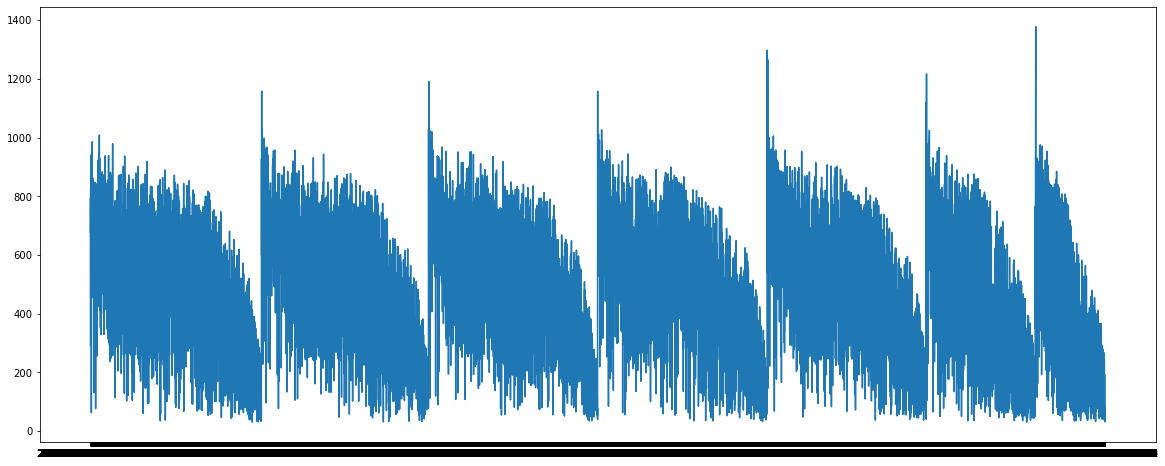

In [18]:
# визуализация временного ряда

plt.figure(figsize=(20,8))
plt.plot(df_3002['pass_dttm'], df_3002['time_to_under'])
plt.show()

Данные представлены в виде временного ряда. Так же в данных присутствует еженедельная цикличность.

In [17]:
# статистика очередного времени захода в метро по станциям

df_3002.groupby('station_id')['time_to_under'].agg(['count', 'min', 'max', 'mean', 'std']).sort_values(by='std')[:10]

,count,min,max,mean,std
station_id,,,,,
14008,2,442.016667,442.133333,442.075000,0.082496
11014,2,573.316667,573.983333,573.650000,0.471405
15006,3,571.600000,588.133333,581.838889,8.944650
14014,2,357.066667,377.650000,367.358333,14.554615
4001,2,611.983333,635.783333,623.883333,16.829141
11021,19,605.433333,692.850000,653.992982,24.268749
7017,7,398.516667,584.250000,502.530952,66.397752
7001,2,345.716667,444.133333,394.925000,69.591092
1013,5,568.266667,727.833333,645.346667,72.958656


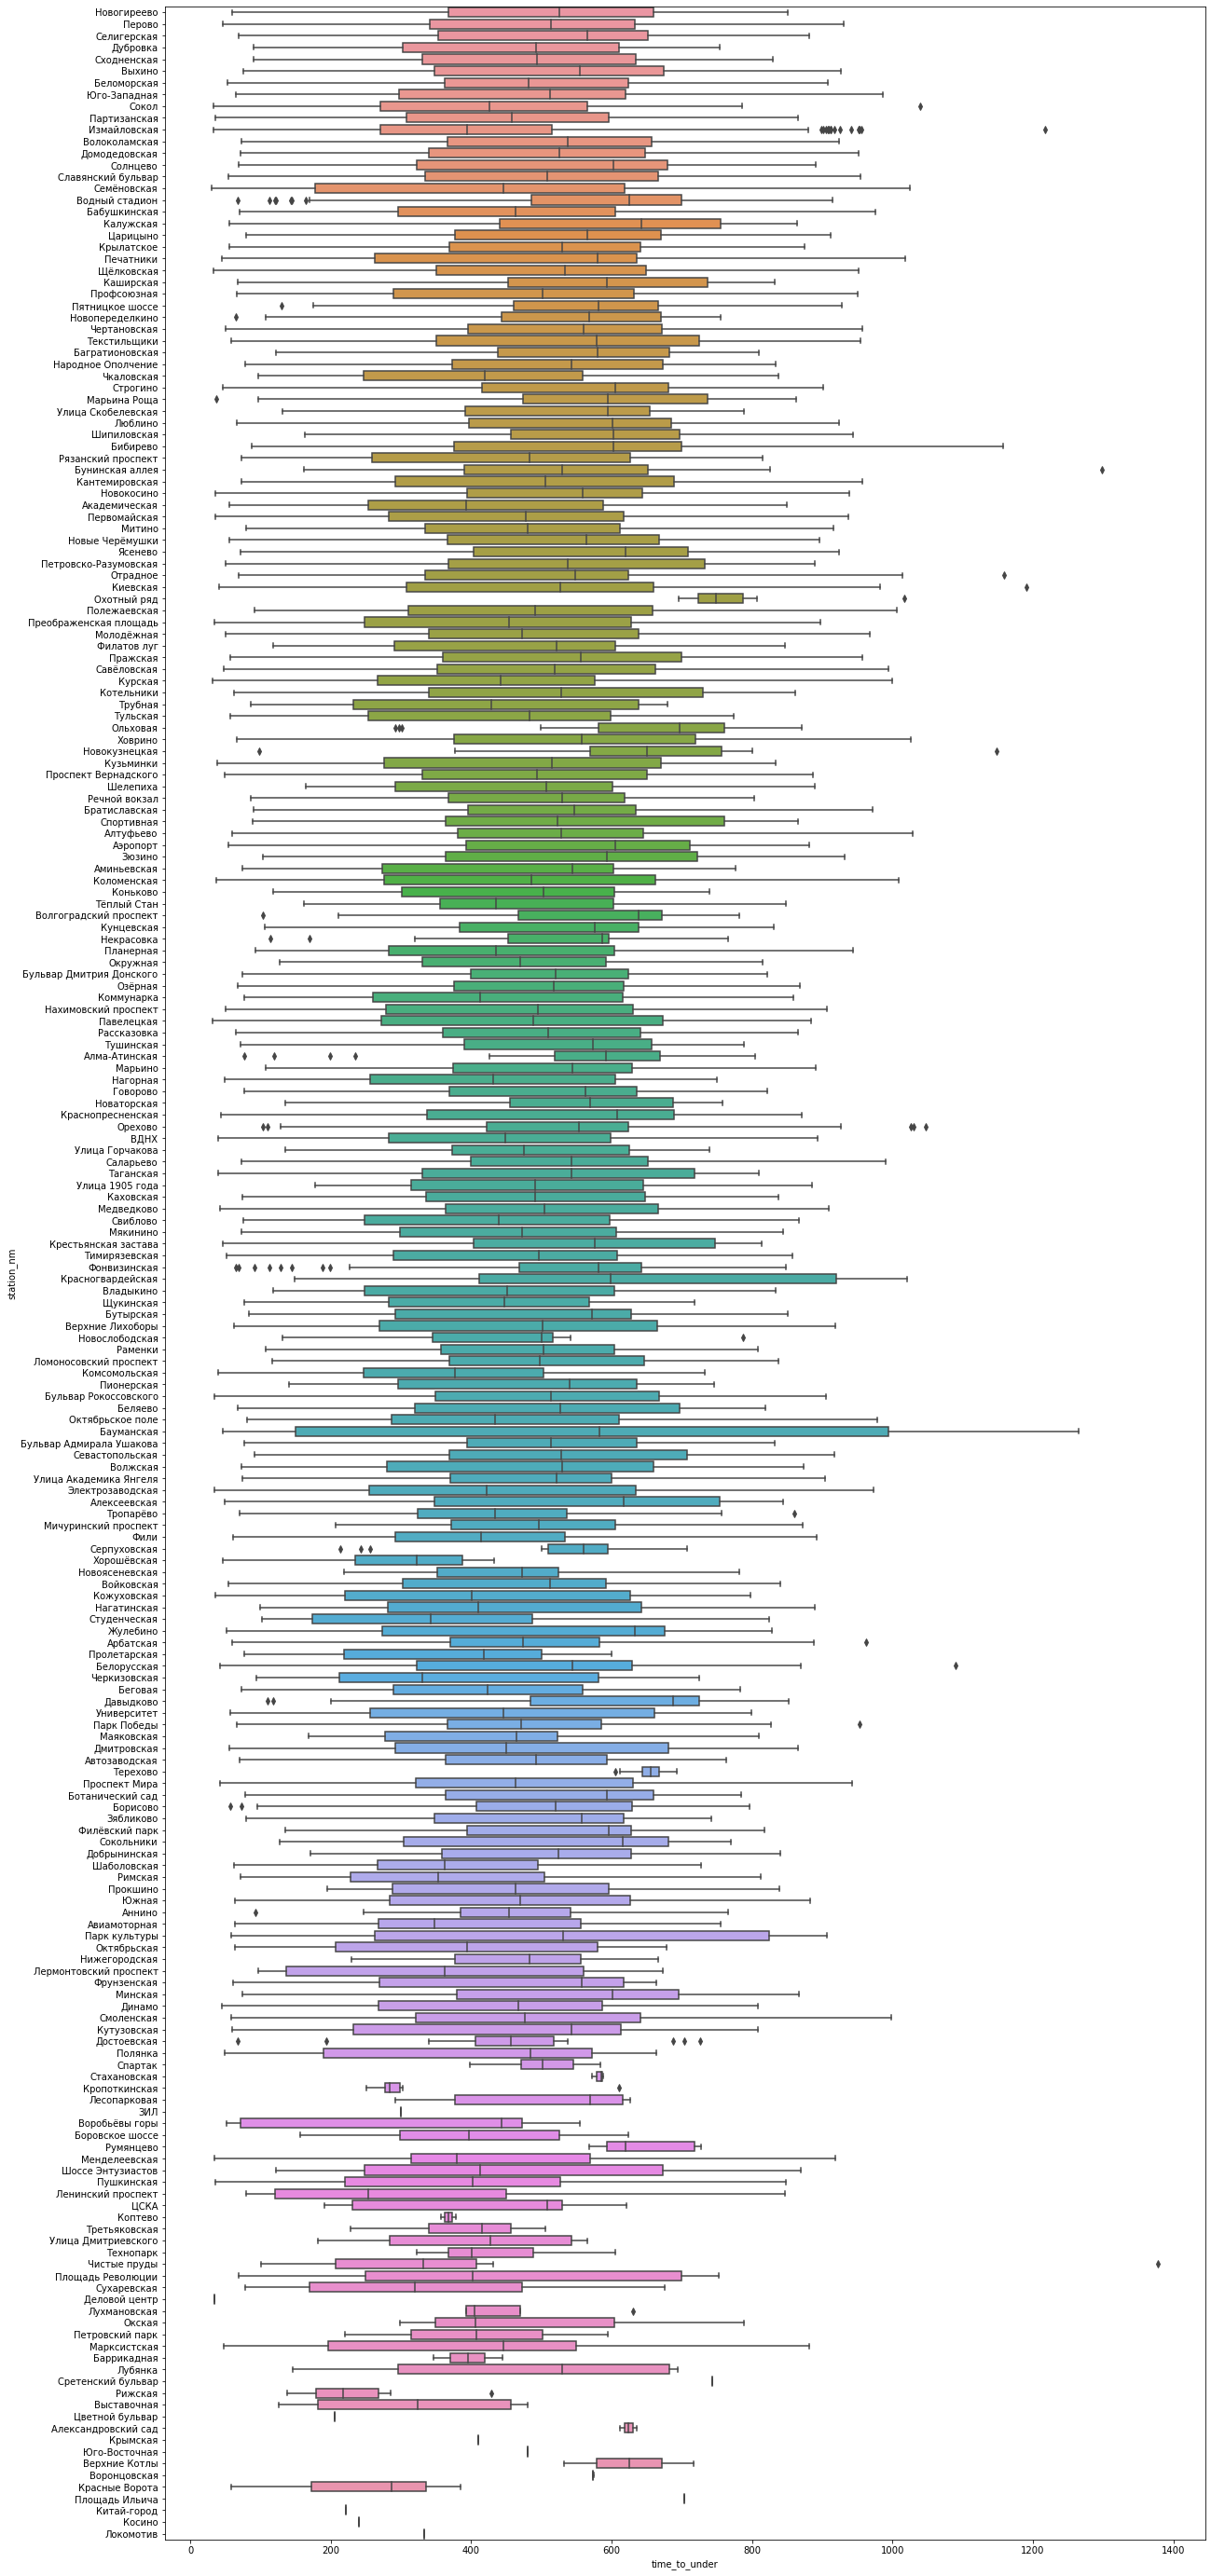

In [18]:
# визализация распределения очередного времени захода метро по станциям

plt.figure(figsize=(20,50))
sns.boxplot(data=df_3002, x='time_to_under', y='station_nm')
plt.show()

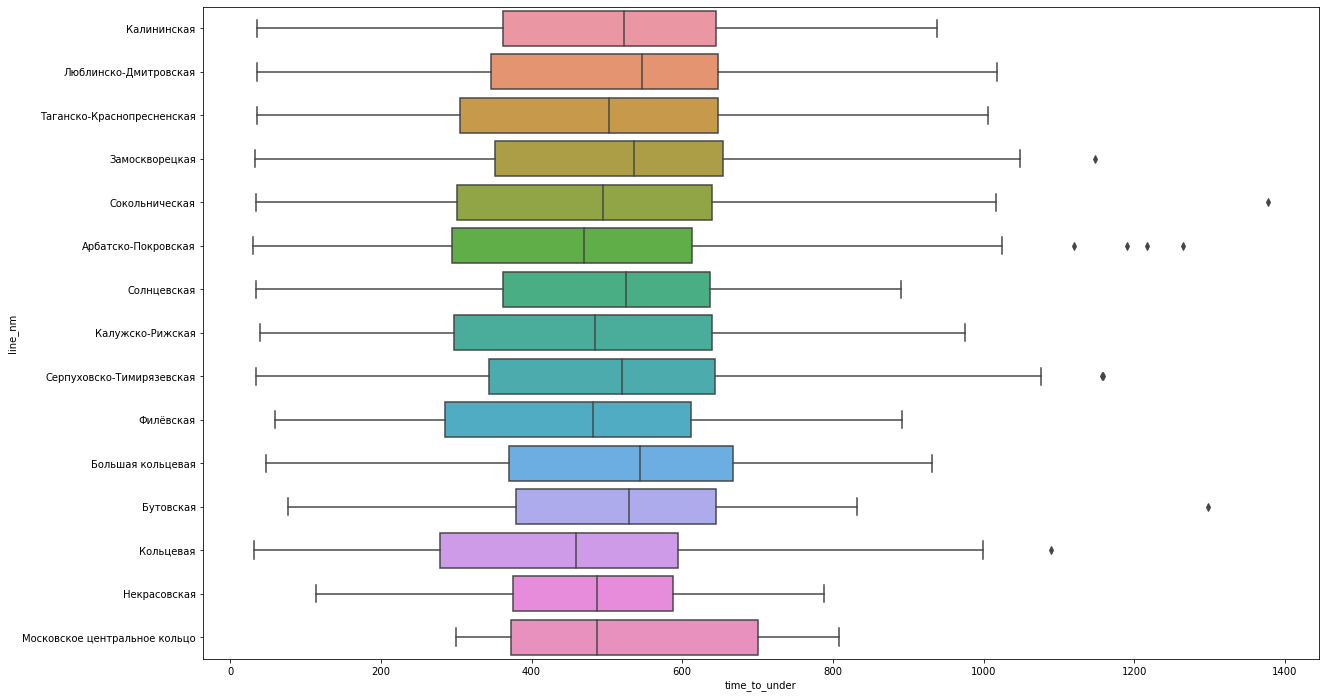

In [19]:
# визализация распределения очередного времени захода метро по линии метро

plt.figure(figsize=(20,12))
sns.boxplot(data=df_3002, x='time_to_under', y='line_nm')
plt.show()

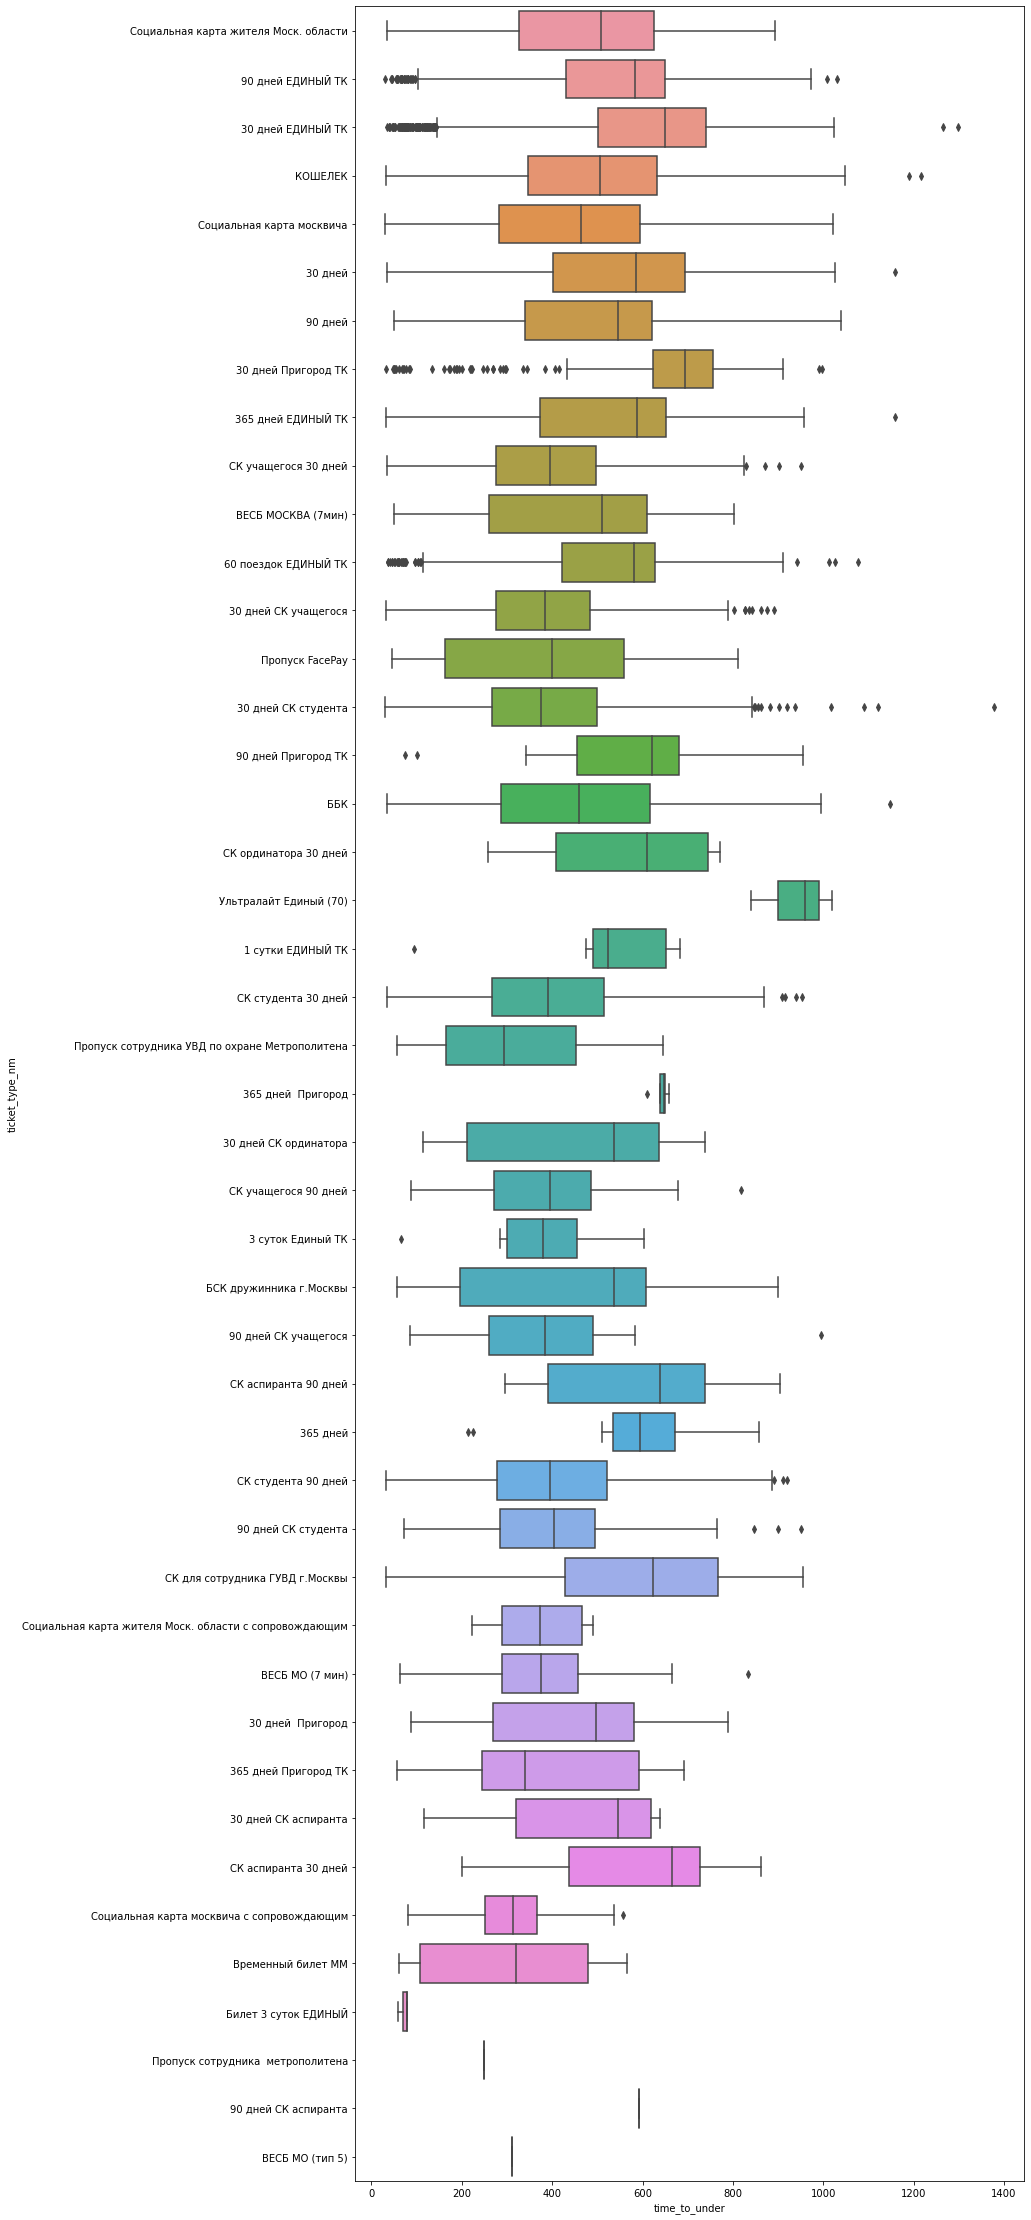

In [20]:
# визализация распределения очередного времени захода метро по типу билета

plt.figure(figsize=(12,40))
sns.boxplot(data=df_3002, x='time_to_under', y='ticket_type_nm')
plt.show()

In [21]:
# статистика по количеству соответствующего типа билета

df_3002['ticket_type_nm'].value_counts()

КОШЕЛЕК                                                   3919
30 дней ЕДИНЫЙ ТК                                         2200
Социальная карта москвича                                 1750
СК студента 30 дней                                       1609
30 дней СК студента                                       1592
30 дней                                                   1470
90 дней ЕДИНЫЙ ТК                                          745
60 поездок ЕДИНЫЙ ТК                                       605
30 дней СК учащегося                                       583
ББК                                                        449
30 дней Пригород ТК                                        372
СК учащегося 30 дней                                       355
365 дней ЕДИНЫЙ ТК                                         343
СК студента 90 дней                                        264
Социальная карта жителя Моск. области                      232
90 дней                                                

In [22]:
# вывод данных

df_3002.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
id,,,,,,,,,,,
61,764D546455E294FF9ACFB1A863A10E4B,Социальная карта жителя Моск. области,218,Новогиреево (Восточный),8003,Новогиреево,8,Калининская,2022-09-12 05:22:19,677.233333,3002
234,08C38EBE7D5FE076740767D284BC9461,90 дней ЕДИНЫЙ ТК,221,Перово (Восточный),8005,Перово,8,Калининская,2022-09-12 05:28:54,706.883333,3002
308,F13C0CD1665DC19E1344C679EDE629B3,30 дней ЕДИНЫЙ ТК,2227,Селигерская (Второй),10018,Селигерская,10,Люблинско-Дмитровская,2022-09-12 05:29:53,792.900000,3002
421,775F417B46D967439A38F3309F9F297C,30 дней ЕДИНЫЙ ТК,730,Дубровка,10007,Дубровка,10,Люблинско-Дмитровская,2022-09-12 05:30:24,290.266667,3002
527,402E9F04DAA4F79487D870516DE00CB5,КОШЕЛЕК,343,Сходненская (Первый),7018,Сходненская,7,Таганско-Краснопресненская,2022-09-12 05:30:53,829.166667,3002


In [24]:
# среднее время очередного захода в метро в часах

df_3002['time_to_under'].mean() / 60

8.021662243965828

In [19]:
# максимальное время очередного захода в метро в часах

df_3002['time_to_under'].max() / 60

22.960833333333333

In [26]:
df_3002['time_to_under_hour'] = (df_3002['time_to_under'] / 60).round().astype('int')

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9316\4179500199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3002['time_to_under_hour'] = (df_3002['time_to_under'] / 60).round().astype('int')


In [27]:
df_3002['time_to_under_hour'].describe()

count    17272.000000
mean         8.024491
std          3.458285
min          1.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         23.000000
Name: time_to_under_hour, dtype: float64

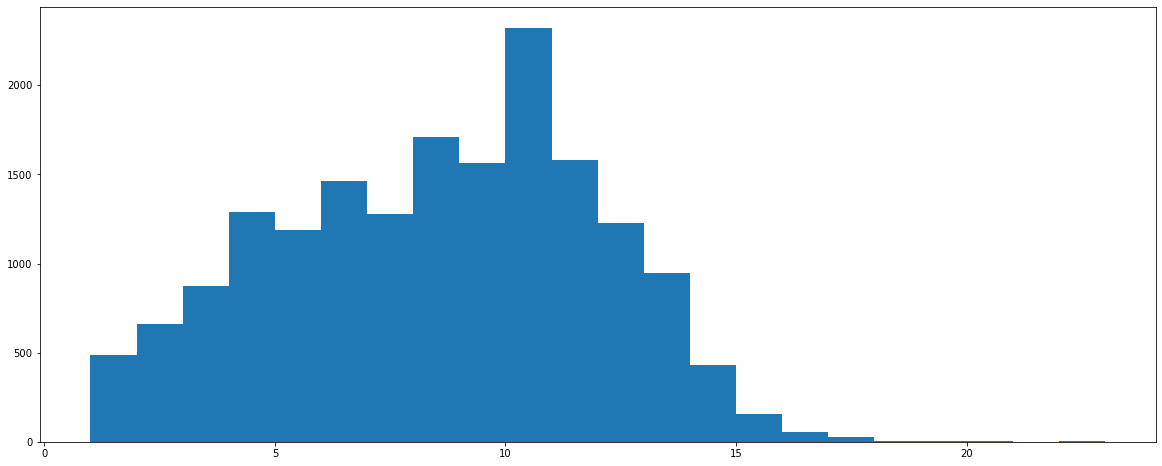

In [28]:
plt.figure(figsize=(20,8))
plt.hist(df_3002['time_to_under_hour'], bins=22)
plt.show()

In [29]:
df_3002['time_to_under_hour'].nunique()

23

In [30]:
df_3002.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,time_to_under_hour
id,,,,,,,,,,,,
61,764D546455E294FF9ACFB1A863A10E4B,Социальная карта жителя Моск. области,218,Новогиреево (Восточный),8003,Новогиреево,8,Калининская,2022-09-12 05:22:19,677.233333,3002,11
234,08C38EBE7D5FE076740767D284BC9461,90 дней ЕДИНЫЙ ТК,221,Перово (Восточный),8005,Перово,8,Калининская,2022-09-12 05:28:54,706.883333,3002,12
308,F13C0CD1665DC19E1344C679EDE629B3,30 дней ЕДИНЫЙ ТК,2227,Селигерская (Второй),10018,Селигерская,10,Люблинско-Дмитровская,2022-09-12 05:29:53,792.900000,3002,13
421,775F417B46D967439A38F3309F9F297C,30 дней ЕДИНЫЙ ТК,730,Дубровка,10007,Дубровка,10,Люблинско-Дмитровская,2022-09-12 05:30:24,290.266667,3002,5
527,402E9F04DAA4F79487D870516DE00CB5,КОШЕЛЕК,343,Сходненская (Первый),7018,Сходненская,7,Таганско-Краснопресненская,2022-09-12 05:30:53,829.166667,3002,14


In [31]:
df_3002.sort_values(by=['station_id', 'pass_dttm', 'entrance_id'])[:10]

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,time_to_under_hour
id,,,,,,,,,,,,
32182,1DABFCE56D015E423202C788E9DB16DD,КОШЕЛЕК,20,Бульвар Рокоссовского (Северный),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-12 07:17:30,514.550000,3002,9
42708,A9E2B2719CA68333AA1FE1B583479A24,30 дней ЕДИНЫЙ ТК,21,Бульвар Рокоссовского ( Южный ),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-12 07:35:56,887.266667,3002,15
44756,47CFDD8476C5375B8C7D40FE73D94742,КОШЕЛЕК,21,Бульвар Рокоссовского ( Южный ),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-12 07:39:24,610.916667,3002,10
64831,571470A9B2E7701E4633EAE0E37CF2A4,СК студента 90 дней,20,Бульвар Рокоссовского (Северный),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-12 08:07:57,239.033333,3002,4
72789,EED74B1BC35E965932F2CE696A967DF3,30 дней СК учащегося,21,Бульвар Рокоссовского ( Южный ),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-12 08:17:49,466.566667,3002,8
91301,58584E3D5C036ED6316FF23C4BD2CB1D,СК студента 90 дней,21,Бульвар Рокоссовского ( Южный ),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-12 08:44:08,735.566667,3002,12
100898,92EF25304EB82FA84FCC2457574FD4AF,КОШЕЛЕК,21,Бульвар Рокоссовского ( Южный ),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-12 09:03:33,617.450000,3002,10
107692,FAF80D0B612F5DC00AD3DD2DB786A55F,60 поездок ЕДИНЫЙ ТК,21,Бульвар Рокоссовского ( Южный ),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-12 09:18:09,529.033333,3002,9
112323,EFDC1891B99B81B5BA693640DDB426BD,30 дней,21,Бульвар Рокоссовского ( Южный ),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-12 09:28:47,504.733333,3002,8


In [32]:
df_3002['pass_dttm'].dtype

dtype('O')

In [33]:
df_3002['pass_dttm'] = pd.to_datetime(df_3002['pass_dttm'])

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9316\433026555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3002['pass_dttm'] = pd.to_datetime(df_3002['pass_dttm'])


In [34]:
df_3002['dayofweek'] = df_3002['pass_dttm'].dt.dayofweek
df_3002['time'] = df_3002['pass_dttm'].dt.time
df_3002['hour'] = df_3002['pass_dttm'].dt.hour
df_3002['minute'] = df_3002['pass_dttm'].dt.minute
df_3002['second'] = df_3002['pass_dttm'].dt.second
df_3002['day'] = df_3002['pass_dttm'].dt.date

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9316\575056144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3002['dayofweek'] = df_3002['pass_dttm'].dt.dayofweek
C:\Users\rus_k\AppData\Local\Temp\ipykernel_9316\575056144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3002['time'] = df_3002['pass_dttm'].dt.time
C:\Users\rus_k\AppData\Local\Temp\ipykernel_9316\575056144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [35]:
df_3002.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,time_to_under_hour,dayofweek,time,hour,minute,second,day
id,,,,,,,,,,,,,,,,,,
61,764D546455E294FF9ACFB1A863A10E4B,Социальная карта жителя Моск. области,218,Новогиреево (Восточный),8003,Новогиреево,8,Калининская,2022-09-12 05:22:19,677.233333,3002,11,0,05:22:19,5,22,19,2022-09-12
234,08C38EBE7D5FE076740767D284BC9461,90 дней ЕДИНЫЙ ТК,221,Перово (Восточный),8005,Перово,8,Калининская,2022-09-12 05:28:54,706.883333,3002,12,0,05:28:54,5,28,54,2022-09-12
308,F13C0CD1665DC19E1344C679EDE629B3,30 дней ЕДИНЫЙ ТК,2227,Селигерская (Второй),10018,Селигерская,10,Люблинско-Дмитровская,2022-09-12 05:29:53,792.900000,3002,13,0,05:29:53,5,29,53,2022-09-12
421,775F417B46D967439A38F3309F9F297C,30 дней ЕДИНЫЙ ТК,730,Дубровка,10007,Дубровка,10,Люблинско-Дмитровская,2022-09-12 05:30:24,290.266667,3002,5,0,05:30:24,5,30,24,2022-09-12
527,402E9F04DAA4F79487D870516DE00CB5,КОШЕЛЕК,343,Сходненская (Первый),7018,Сходненская,7,Таганско-Краснопресненская,2022-09-12 05:30:53,829.166667,3002,14,0,05:30:53,5,30,53,2022-09-12


In [36]:
df_3002['ticket_type_nm'].nunique()

45

In [37]:
df_3002['ticket_type_nm'].value_counts()[:23]

КОШЕЛЕК                                  3919
30 дней ЕДИНЫЙ ТК                        2200
Социальная карта москвича                1750
СК студента 30 дней                      1609
30 дней СК студента                      1592
30 дней                                  1470
90 дней ЕДИНЫЙ ТК                         745
60 поездок ЕДИНЫЙ ТК                      605
30 дней СК учащегося                      583
ББК                                       449
30 дней Пригород ТК                       372
СК учащегося 30 дней                      355
365 дней ЕДИНЫЙ ТК                        343
СК студента 90 дней                       264
Социальная карта жителя Моск. области     232
90 дней                                   156
90 дней СК студента                        90
СК учащегося 90 дней                       85
ВЕСБ МОСКВА (7мин)                         76
Пропуск FacePay                            45
БСК дружинника г.Москвы                    38
30 дней  Пригород                 

In [38]:
df_3002['ticket_type_nm'].value_counts()[-22:]

90 дней СК учащегося                                      25
СК для сотрудника ГУВД г.Москвы                           24
Социальная карта москвича с сопровождающим                21
365 дней Пригород ТК                                      17
СК аспиранта 30 дней                                      17
ВЕСБ МО (7 мин)                                           16
365 дней                                                  15
Пропуск сотрудника УВД по охране Метрополитена            15
Социальная карта жителя Моск. области с сопровождающим    15
СК аспиранта 90 дней                                      12
30 дней СК аспиранта                                      12
СК ординатора 30 дней                                     11
30 дней СК ординатора                                      7
1 сутки ЕДИНЫЙ ТК                                          7
3 суток Единый ТК                                          6
Временный билет ММ                                         6
365 дней  Пригород      

In [39]:
data = []
for words in df_3002['ticket_type_nm'].drop_duplicates().values:
    for word in words.split():
        if word.lower() not in data and len(word) > 3:
            data.append(word.lower())

In [40]:
data

['социальная',
 'карта',
 'жителя',
 'моск.',
 'области',
 'дней',
 'единый',
 'кошелек',
 'москвича',
 'пригород',
 'учащегося',
 'весб',
 'москва',
 '(7мин)',
 'поездок',
 'пропуск',
 'facepay',
 'студента',
 'ординатора',
 'ультралайт',
 '(70)',
 'сутки',
 'сотрудника',
 'охране',
 'метрополитена',
 'суток',
 'дружинника',
 'г.москвы',
 'аспиранта',
 'гувд',
 'сопровождающим',
 'мин)',
 'временный',
 'билет',
 '(тип']

In [41]:
def ticket_type(name):
    if 'пригород' in name.lower():
        return 'пригород'
    elif 'стажер' in name.lower():
        return 'стажер'
    elif 'студент' in name.lower():
        return 'студент'
    elif 'аспирант' in name.lower():
        return 'аспирант'
    elif 'ординатор' in name.lower():
        return 'ординатор'
    elif 'единый' in name.lower():
        return 'единый'
    elif 'област' in name.lower():
        return 'область'
    elif 'метро' in name.lower():
        return 'метро'
    elif 'пропуск' in name.lower():
        return 'пропуск'
    elif 'весб' in name.lower():
        return 'весб'
    elif 'кошелек' in name.lower():
        return 'кошелек'
    elif 'учащег' in name.lower():
        return 'учащейся'
    elif 'социал' in name.lower():
        return 'социальная'
    elif 'г.москвы' in name.lower():
        return 'полиция'
    elif 'дней' in name.lower():
        return 'единый'
    elif 'транспорт' in name.lower():
        return 'единый'
    else:
        return 'карта'

In [42]:
df_3002['ticket_type'] = df_3002['ticket_type_nm'].apply(lambda x: ticket_type(x))

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9316\228123369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3002['ticket_type'] = df_3002['ticket_type_nm'].apply(lambda x: ticket_type(x))


In [43]:
df_3002['ticket_type'].value_counts()

единый        5553
кошелек       3919
студент       3555
социальная    1771
учащейся      1048
карта          455
пригород       448
область        247
весб            93
полиция         62
пропуск         45
аспирант        42
ординатор       18
метро           16
Name: ticket_type, dtype: int64

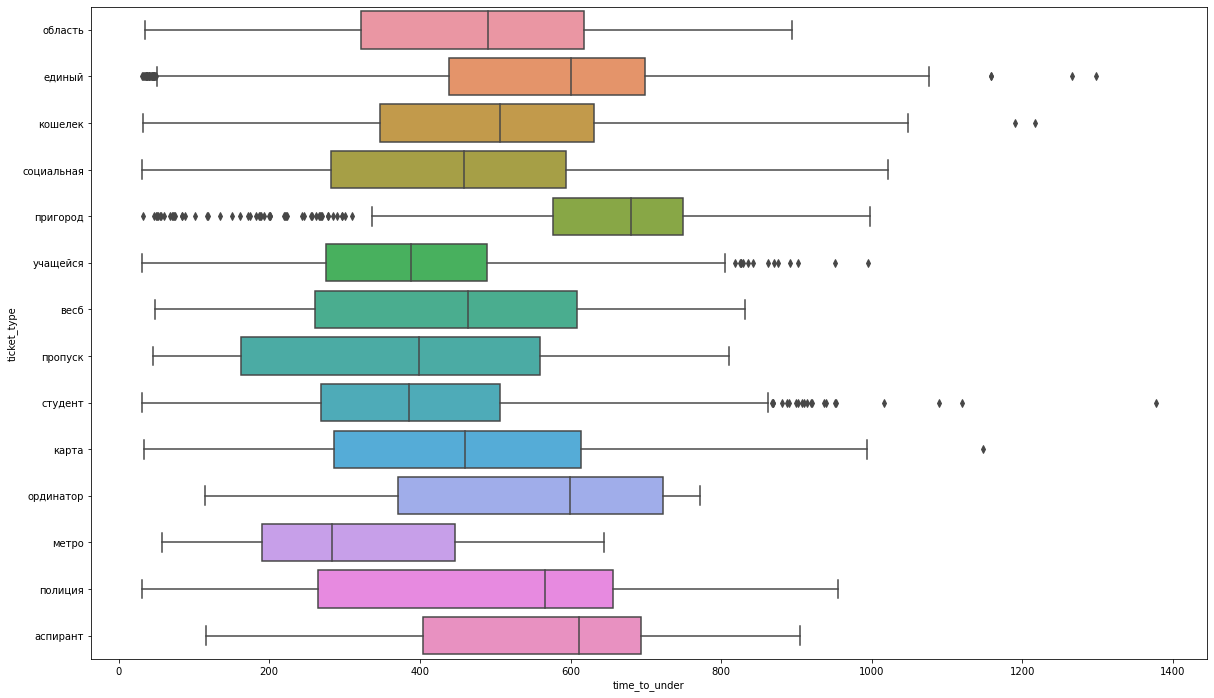

In [44]:
plt.figure(figsize=(20,12))
sns.boxplot(data=df_3002, x='time_to_under', y='ticket_type')
plt.show()

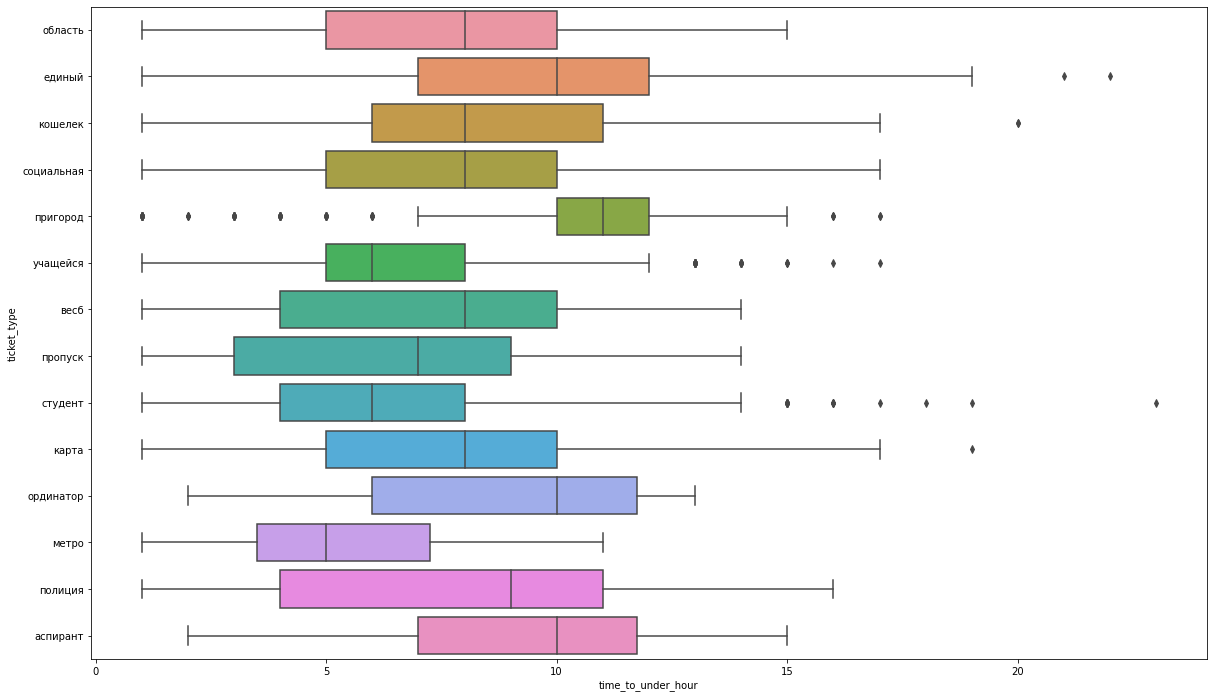

In [45]:
plt.figure(figsize=(20,12))
sns.boxplot(data=df_3002, x='time_to_under_hour', y='ticket_type')
plt.show()

In [46]:
df_3002.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,time_to_under_hour,dayofweek,time,hour,minute,second,day,ticket_type
id,,,,,,,,,,,,,,,,,,,
61,764D546455E294FF9ACFB1A863A10E4B,Социальная карта жителя Моск. области,218,Новогиреево (Восточный),8003,Новогиреево,8,Калининская,2022-09-12 05:22:19,677.233333,3002,11,0,05:22:19,5,22,19,2022-09-12,область
234,08C38EBE7D5FE076740767D284BC9461,90 дней ЕДИНЫЙ ТК,221,Перово (Восточный),8005,Перово,8,Калининская,2022-09-12 05:28:54,706.883333,3002,12,0,05:28:54,5,28,54,2022-09-12,единый
308,F13C0CD1665DC19E1344C679EDE629B3,30 дней ЕДИНЫЙ ТК,2227,Селигерская (Второй),10018,Селигерская,10,Люблинско-Дмитровская,2022-09-12 05:29:53,792.900000,3002,13,0,05:29:53,5,29,53,2022-09-12,единый
421,775F417B46D967439A38F3309F9F297C,30 дней ЕДИНЫЙ ТК,730,Дубровка,10007,Дубровка,10,Люблинско-Дмитровская,2022-09-12 05:30:24,290.266667,3002,5,0,05:30:24,5,30,24,2022-09-12,единый
527,402E9F04DAA4F79487D870516DE00CB5,КОШЕЛЕК,343,Сходненская (Первый),7018,Сходненская,7,Таганско-Краснопресненская,2022-09-12 05:30:53,829.166667,3002,14,0,05:30:53,5,30,53,2022-09-12,кошелек


In [47]:
ticket_type_names = df_3002['ticket_type'].unique()
ticket_type_names

array(['область', 'единый', 'кошелек', 'социальная', 'пригород',
       'учащейся', 'весб', 'пропуск', 'студент', 'карта', 'ординатор',
       'метро', 'полиция', 'аспирант'], dtype=object)

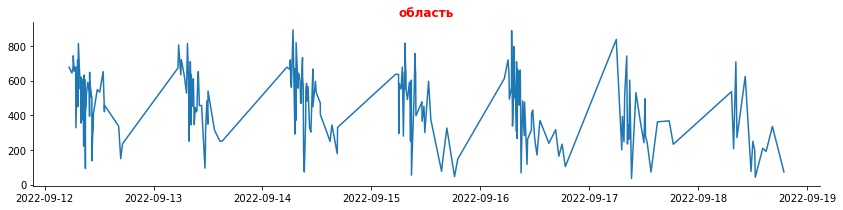

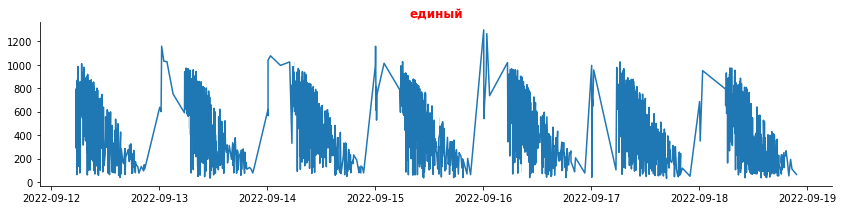

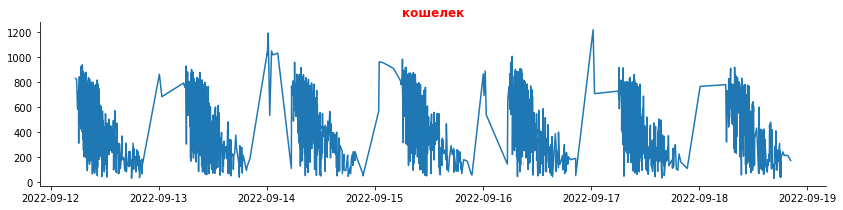

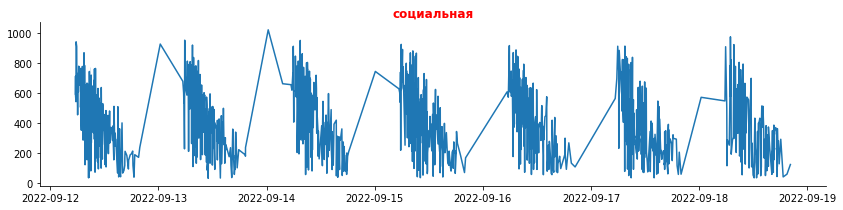

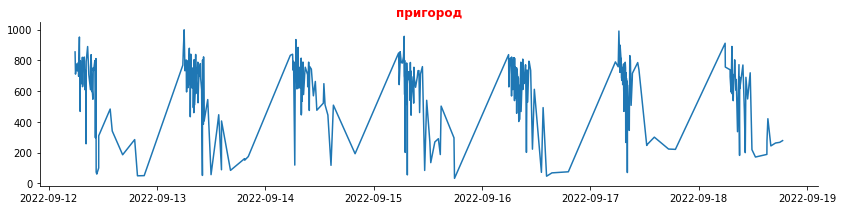

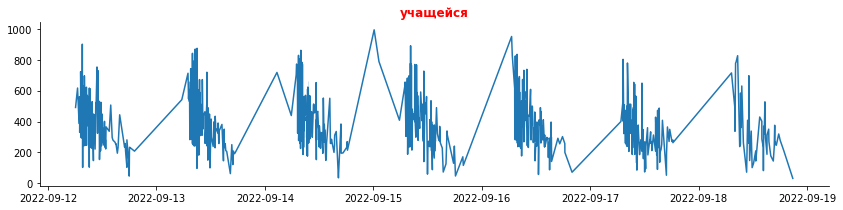

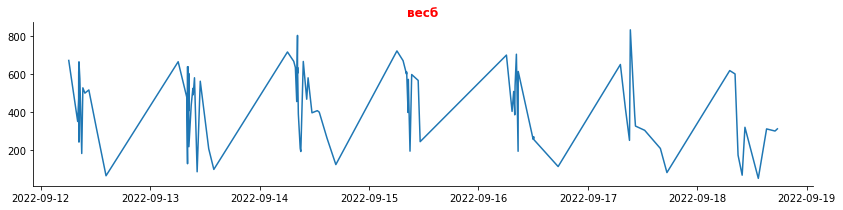

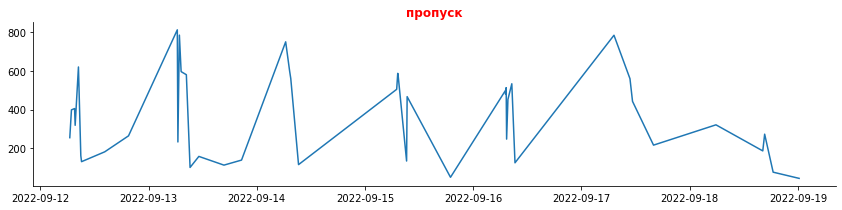

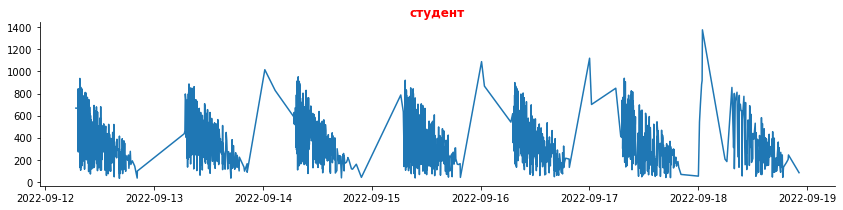

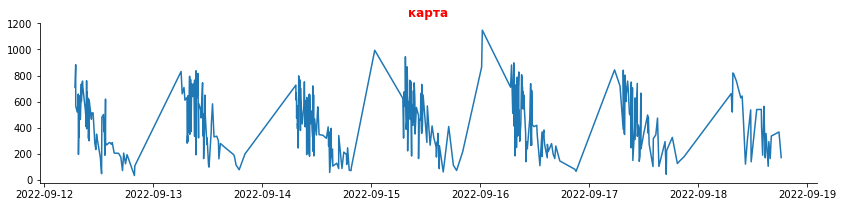

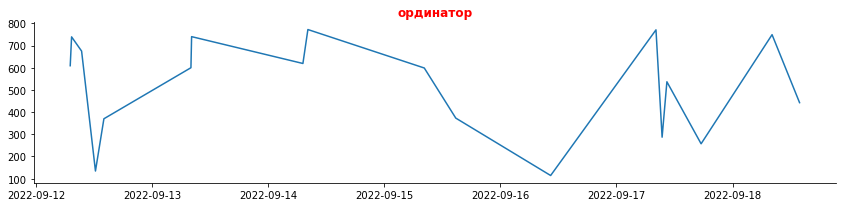

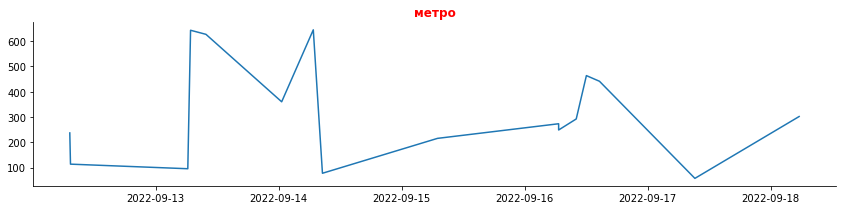

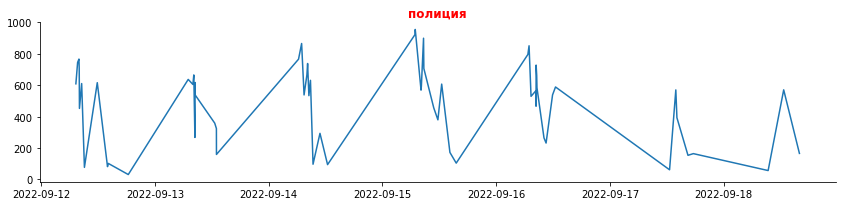

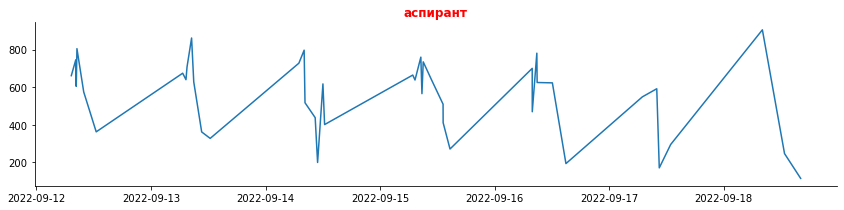

In [48]:
for ticket_type_name in ticket_type_names:
    sns.relplot(x = 'pass_dttm', y = 'time_to_under', height=3, aspect=4,\
            data = df_3002[df_3002['ticket_type'] == ticket_type_name], kind="line")
    plt.xticks(rotation=0, ha="center")
    plt.title(f'{ticket_type_name}', \
          c='r', fontweight='bold', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [49]:
df_3002.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,time_to_under_hour,dayofweek,time,hour,minute,second,day,ticket_type
id,,,,,,,,,,,,,,,,,,,
61,764D546455E294FF9ACFB1A863A10E4B,Социальная карта жителя Моск. области,218,Новогиреево (Восточный),8003,Новогиреево,8,Калининская,2022-09-12 05:22:19,677.233333,3002,11,0,05:22:19,5,22,19,2022-09-12,область
234,08C38EBE7D5FE076740767D284BC9461,90 дней ЕДИНЫЙ ТК,221,Перово (Восточный),8005,Перово,8,Калининская,2022-09-12 05:28:54,706.883333,3002,12,0,05:28:54,5,28,54,2022-09-12,единый
308,F13C0CD1665DC19E1344C679EDE629B3,30 дней ЕДИНЫЙ ТК,2227,Селигерская (Второй),10018,Селигерская,10,Люблинско-Дмитровская,2022-09-12 05:29:53,792.900000,3002,13,0,05:29:53,5,29,53,2022-09-12,единый
421,775F417B46D967439A38F3309F9F297C,30 дней ЕДИНЫЙ ТК,730,Дубровка,10007,Дубровка,10,Люблинско-Дмитровская,2022-09-12 05:30:24,290.266667,3002,5,0,05:30:24,5,30,24,2022-09-12,единый
527,402E9F04DAA4F79487D870516DE00CB5,КОШЕЛЕК,343,Сходненская (Первый),7018,Сходненская,7,Таганско-Краснопресненская,2022-09-12 05:30:53,829.166667,3002,14,0,05:30:53,5,30,53,2022-09-12,кошелек


In [50]:
pd.crosstab(df_3002['time_to_under_hour'], df_3002['hour'])

hour,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
time_to_under_hour,,,,,,,,,,,,,,,,,,,,,
1,3,0,0,0,0,1,5,7,21,32,...,36,47,53,56,36,32,19,14,11,2
2,0,0,0,0,0,3,4,24,44,37,...,56,49,41,69,62,50,35,18,3,0
3,0,0,0,0,0,1,6,33,40,80,...,67,76,70,78,80,73,50,16,0,0
4,0,0,0,0,0,3,12,105,142,116,...,111,130,125,59,78,67,26,1,0,0
5,0,0,0,0,0,5,11,168,88,150,...,101,144,50,52,49,34,1,0,0,0
6,2,0,0,0,0,1,8,210,208,175,...,209,66,53,39,28,1,0,0,0,0
7,0,0,0,0,0,2,16,197,184,216,...,85,51,38,19,4,0,0,0,0,0
8,0,0,0,0,0,1,19,354,363,336,...,75,23,22,2,0,0,0,0,0,0
9,7,0,0,0,0,8,61,374,362,350,...,31,20,3,0,0,0,0,0,0,0


In [51]:
(df_3002['hour'] + df_3002['time_to_under_hour']).max()

24

In [52]:
df_3002.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,time_to_under_hour,dayofweek,time,hour,minute,second,day,ticket_type
id,,,,,,,,,,,,,,,,,,,
61,764D546455E294FF9ACFB1A863A10E4B,Социальная карта жителя Моск. области,218,Новогиреево (Восточный),8003,Новогиреево,8,Калининская,2022-09-12 05:22:19,677.233333,3002,11,0,05:22:19,5,22,19,2022-09-12,область
234,08C38EBE7D5FE076740767D284BC9461,90 дней ЕДИНЫЙ ТК,221,Перово (Восточный),8005,Перово,8,Калининская,2022-09-12 05:28:54,706.883333,3002,12,0,05:28:54,5,28,54,2022-09-12,единый
308,F13C0CD1665DC19E1344C679EDE629B3,30 дней ЕДИНЫЙ ТК,2227,Селигерская (Второй),10018,Селигерская,10,Люблинско-Дмитровская,2022-09-12 05:29:53,792.900000,3002,13,0,05:29:53,5,29,53,2022-09-12,единый
421,775F417B46D967439A38F3309F9F297C,30 дней ЕДИНЫЙ ТК,730,Дубровка,10007,Дубровка,10,Люблинско-Дмитровская,2022-09-12 05:30:24,290.266667,3002,5,0,05:30:24,5,30,24,2022-09-12,единый
527,402E9F04DAA4F79487D870516DE00CB5,КОШЕЛЕК,343,Сходненская (Первый),7018,Сходненская,7,Таганско-Краснопресненская,2022-09-12 05:30:53,829.166667,3002,14,0,05:30:53,5,30,53,2022-09-12,кошелек


In [53]:
df_3002_corr = df_3002.corr()

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9316\3102688859.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_3002_corr, dtype=np.bool))


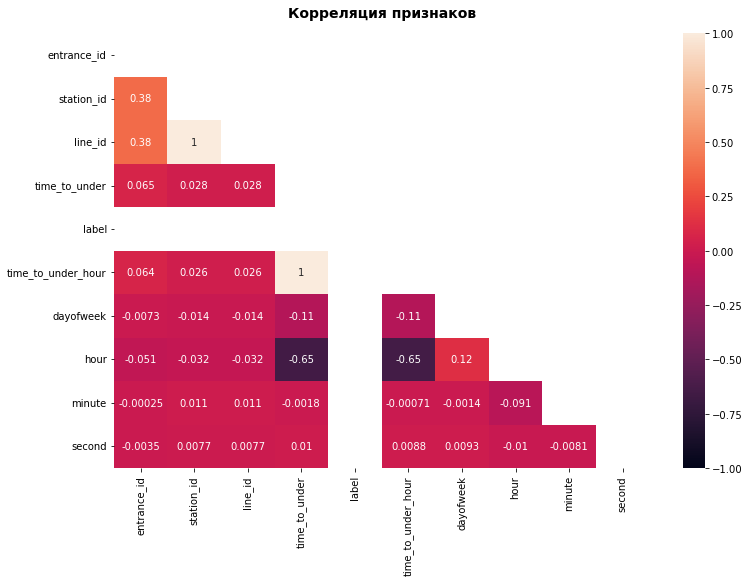

In [54]:
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(df_3002_corr, dtype=np.bool))
df_3002_corr_heatmap = sns.heatmap(df_3002_corr, mask=mask, vmin=-1, vmax=1, annot=True)
df_3002_corr_heatmap.set_title('Корреляция признаков', fontweight='bold', fontdict={'fontsize':14}, pad=16)
plt.show()

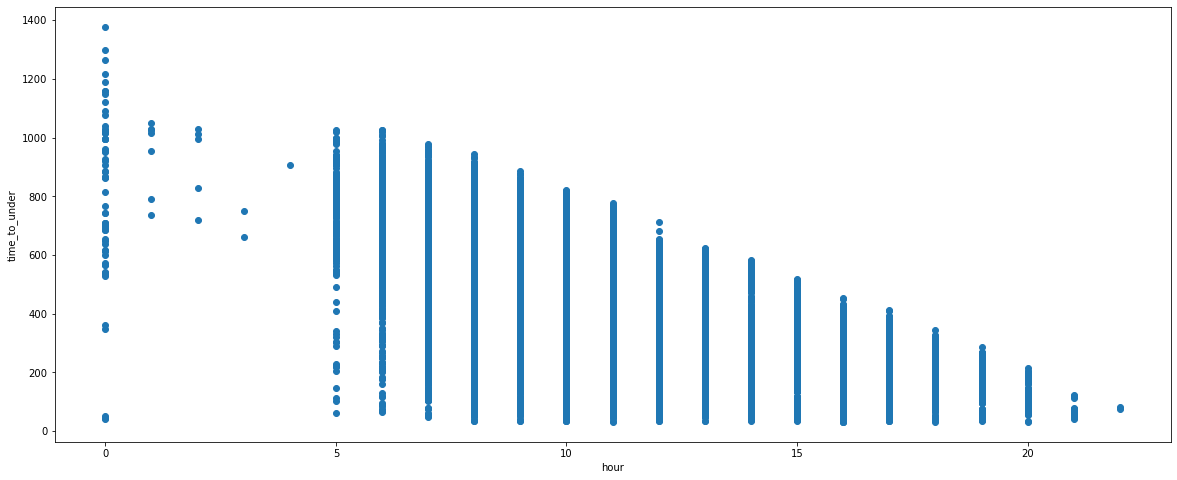

In [55]:
plt.figure(figsize=(20, 8))
plt.scatter(df_3002['hour'], df_3002['time_to_under'])
plt.xlabel('hour')
plt.ylabel('time_to_under')
plt.show()

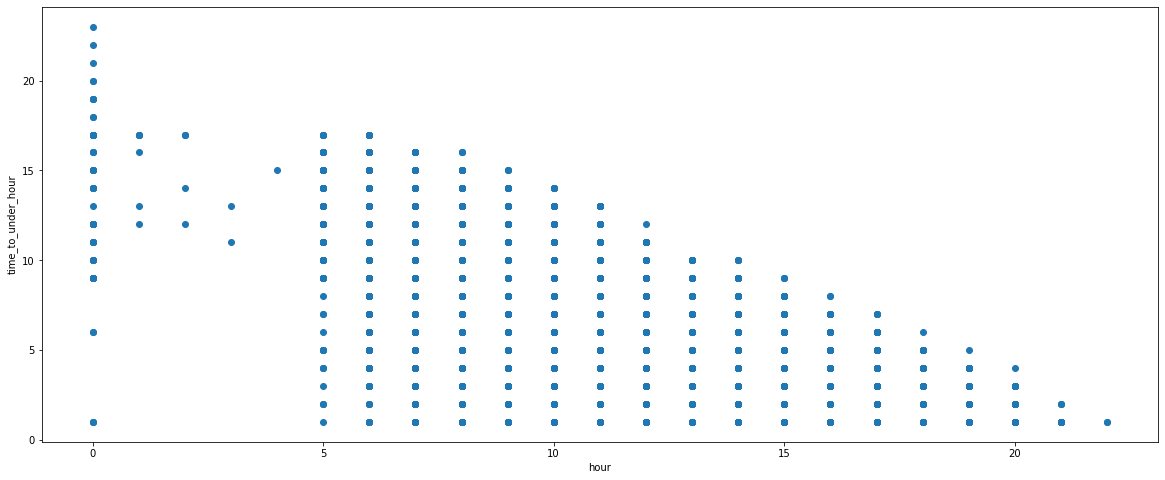

In [56]:
plt.figure(figsize=(20, 8))
plt.scatter(df_3002['hour'], df_3002['time_to_under_hour'])
plt.xlabel('hour')
plt.ylabel('time_to_under_hour')
plt.show()

In [57]:
df_3002['minutes'] = df_3002['hour'] * 60 + df_3002['minute'] + df_3002['second'] // 30

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9316\4162489001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3002['minutes'] = df_3002['hour'] * 60 + df_3002['minute'] + df_3002['second'] // 30


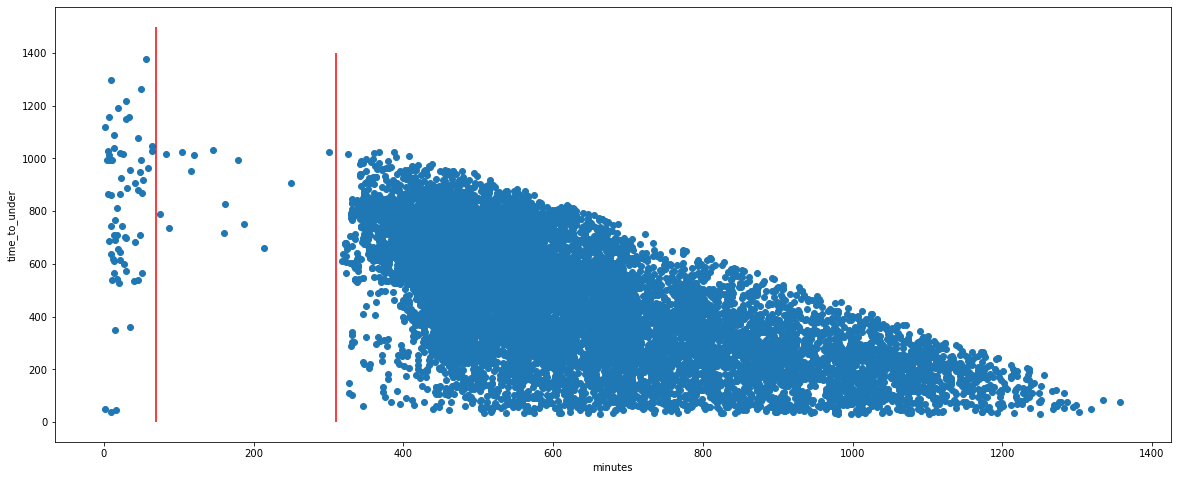

In [58]:
plt.figure(figsize=(20, 8))
plt.scatter(df_3002['minutes'], df_3002['time_to_under'])
plt.xlabel('minutes')
plt.ylabel('time_to_under')
plt.vlines(310, 0, 1400, colors='red')
plt.vlines(70, 0, 1500, colors='red')
plt.show()

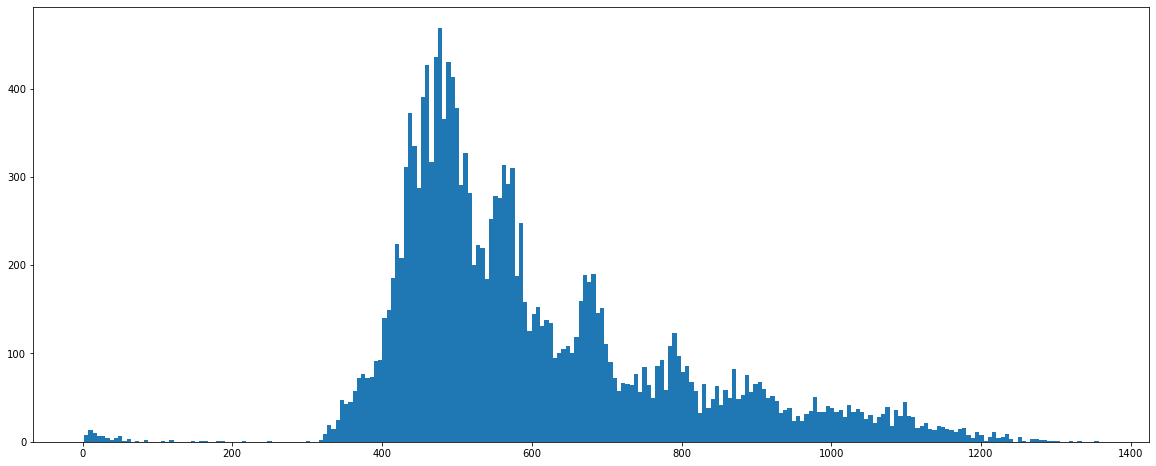

In [59]:
plt.figure(figsize=(20,8))
plt.hist(df_3002['minutes'], bins=df_3002['station_id'].nunique())
plt.show()

In [60]:
df_3002['minutesday'] = df_3002['dayofweek'] * 24 * 60 + df_3002['hour'] * 60 + df_3002['minute'] + df_3002['second'] // 30

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9316\717455938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3002['minutesday'] = df_3002['dayofweek'] * 24 * 60 + df_3002['hour'] * 60 + df_3002['minute'] + df_3002['second'] // 30


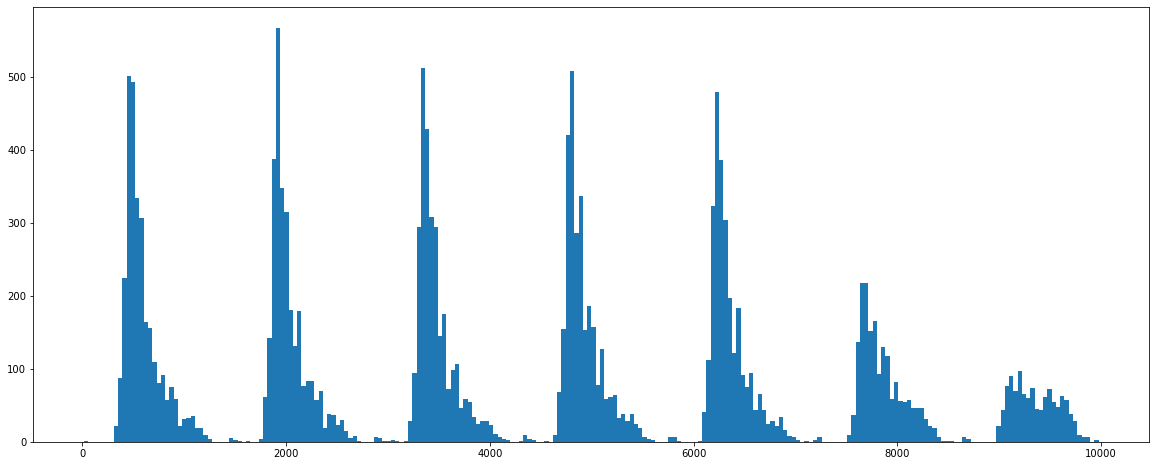

In [61]:
plt.figure(figsize=(20,8))
plt.hist(df_3002['minutesday'], bins=df_3002['station_id'].nunique())
plt.show()

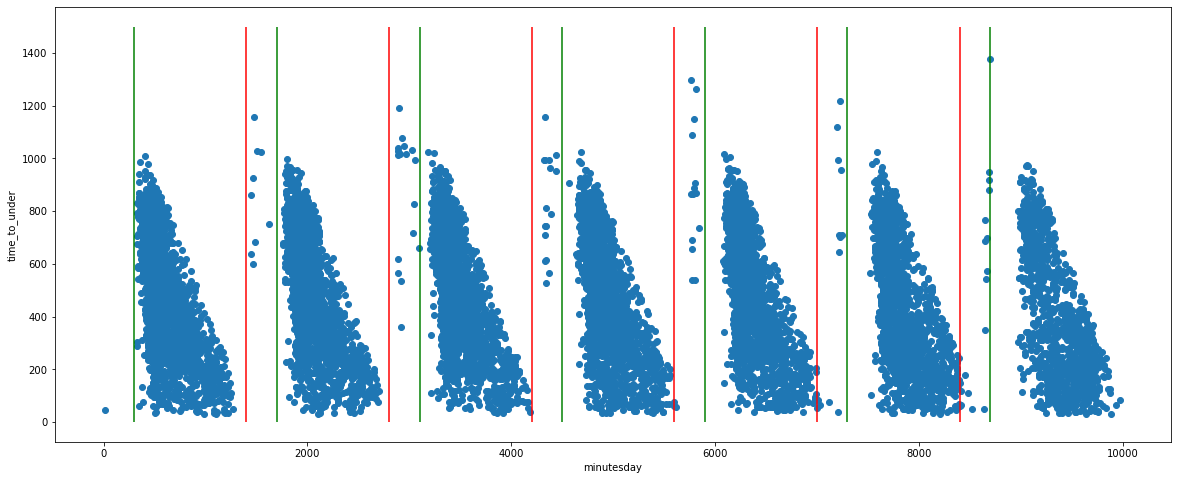

In [62]:
plt.figure(figsize=(20, 8))
plt.scatter(df_3002['minutesday'], df_3002['time_to_under'])
plt.xlabel('minutesday')
plt.ylabel('time_to_under')
plt.vlines(300, 0, 1500, colors='green')
plt.vlines(1400, 0, 1500, colors='red')
plt.vlines(1700, 0, 1500, colors='green')
plt.vlines(2800, 0, 1500, colors='red')
plt.vlines(3100, 0, 1500, colors='green')
plt.vlines(4200, 0, 1500, colors='red')
plt.vlines(4500, 0, 1500, colors='green')
plt.vlines(5600, 0, 1500, colors='red')
plt.vlines(5900, 0, 1500, colors='green')
plt.vlines(7000, 0, 1500, colors='red')
plt.vlines(7300, 0, 1500, colors='green')
plt.vlines(8400, 0, 1500, colors='red')
plt.vlines(8700, 0, 1500, colors='green')
plt.show()

In [63]:
def minutesday_type(minutes):
    if minutes < 300:
        return 0
    elif minutes < 1400:
         return 1
    elif minutes < 1700:
         return 2
    elif minutes < 2800:
         return 3
    elif minutes < 3100:
         return 4
    elif minutes < 4200:
         return 5
    elif minutes < 4500:
         return 6
    elif minutes < 5600:
         return 7
    elif minutes < 5900:
         return 8
    elif minutes < 7000:
         return 9
    elif minutes < 7300:
         return 10
    elif minutes < 8400:
         return 11
    elif minutes < 8700:
         return 12
    else:
         return 13

In [64]:
df_3002['minutesday_type'] = df_3002['minutesday'].apply(lambda x: minutesday_type(x))

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9316\1474171273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3002['minutesday_type'] = df_3002['minutesday'].apply(lambda x: minutesday_type(x))


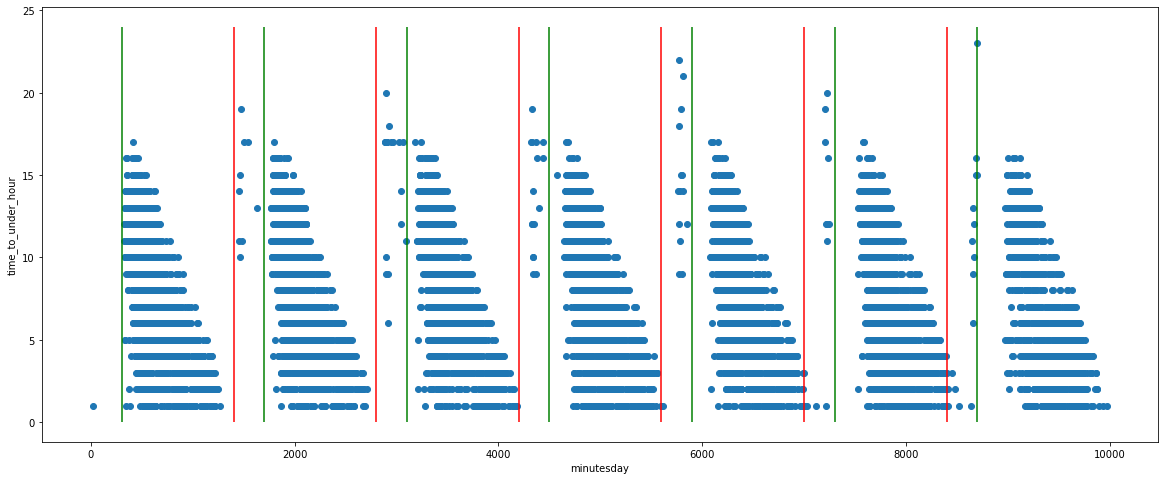

In [65]:
plt.figure(figsize=(20, 8))
plt.scatter(df_3002['minutesday'], df_3002['time_to_under_hour'])
plt.xlabel('minutesday')
plt.ylabel('time_to_under_hour')
plt.vlines(300, 0, 24, colors='green')
plt.vlines(1400, 0, 24, colors='red')
plt.vlines(1700, 0, 24, colors='green')
plt.vlines(2800, 0, 24, colors='red')
plt.vlines(3100, 0, 24, colors='green')
plt.vlines(4200, 0, 24, colors='red')
plt.vlines(4500, 0, 24, colors='green')
plt.vlines(5600, 0, 24, colors='red')
plt.vlines(5900, 0, 24, colors='green')
plt.vlines(7000, 0, 24, colors='red')
plt.vlines(7300, 0, 24, colors='green')
plt.vlines(8400, 0, 24, colors='red')
plt.vlines(8700, 0, 24, colors='green')
plt.show()

In [66]:
df_3002.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,...,dayofweek,time,hour,minute,second,day,ticket_type,minutes,minutesday,minutesday_type
id,,,,,,,,,,,,,,,,,,,,,
61,764D546455E294FF9ACFB1A863A10E4B,Социальная карта жителя Моск. области,218,Новогиреево (Восточный),8003,Новогиреево,8,Калининская,2022-09-12 05:22:19,677.233333,...,0,05:22:19,5,22,19,2022-09-12,область,322,322,1
234,08C38EBE7D5FE076740767D284BC9461,90 дней ЕДИНЫЙ ТК,221,Перово (Восточный),8005,Перово,8,Калининская,2022-09-12 05:28:54,706.883333,...,0,05:28:54,5,28,54,2022-09-12,единый,329,329,1
308,F13C0CD1665DC19E1344C679EDE629B3,30 дней ЕДИНЫЙ ТК,2227,Селигерская (Второй),10018,Селигерская,10,Люблинско-Дмитровская,2022-09-12 05:29:53,792.900000,...,0,05:29:53,5,29,53,2022-09-12,единый,330,330,1
421,775F417B46D967439A38F3309F9F297C,30 дней ЕДИНЫЙ ТК,730,Дубровка,10007,Дубровка,10,Люблинско-Дмитровская,2022-09-12 05:30:24,290.266667,...,0,05:30:24,5,30,24,2022-09-12,единый,330,330,1
527,402E9F04DAA4F79487D870516DE00CB5,КОШЕЛЕК,343,Сходненская (Первый),7018,Сходненская,7,Таганско-Краснопресненская,2022-09-12 05:30:53,829.166667,...,0,05:30:53,5,30,53,2022-09-12,кошелек,331,331,1


In [67]:
df_3002_corr = df_3002.corr()

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9316\3102688859.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_3002_corr, dtype=np.bool))


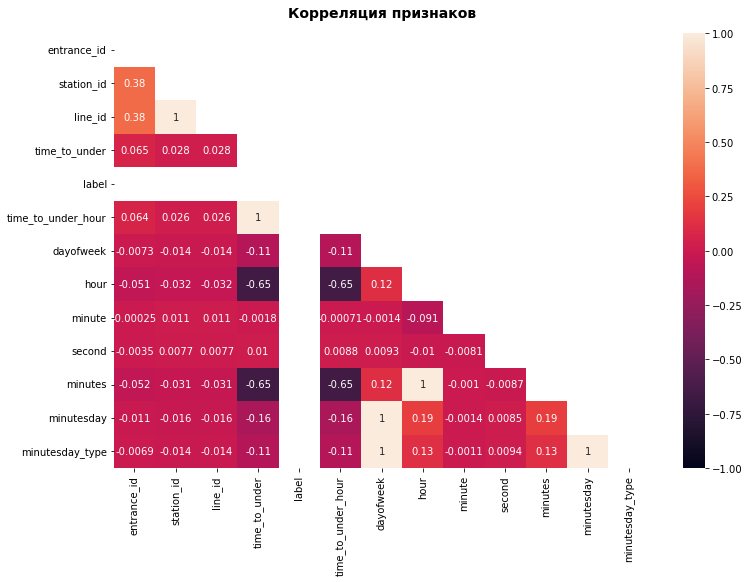

In [68]:
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(df_3002_corr, dtype=np.bool))
df_3002_corr_heatmap = sns.heatmap(df_3002_corr, mask=mask, vmin=-1, vmax=1, annot=True)
df_3002_corr_heatmap.set_title('Корреляция признаков', fontweight='bold', fontdict={'fontsize':14}, pad=16)
plt.show()

In [69]:
df_3002['minutesday_type'].value_counts()

1     2933
5     2881
7     2866
3     2865
9     2704
11    1800
13    1134
4       18
12      18
6       16
8       15
10      12
2        9
0        1
Name: minutesday_type, dtype: int64

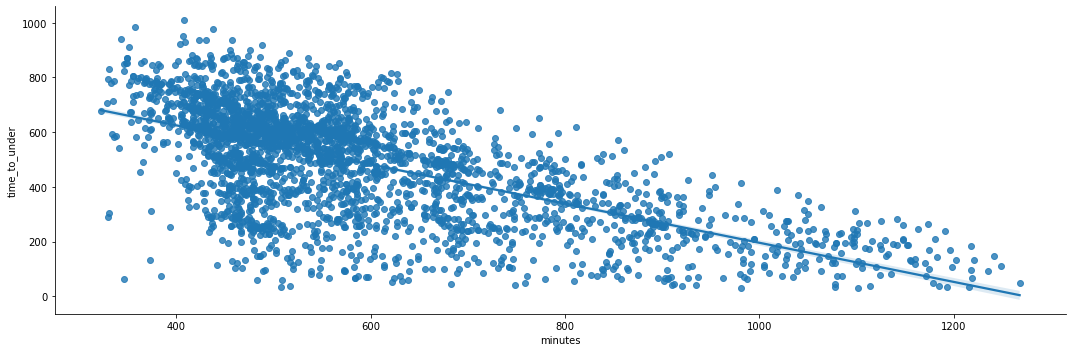

In [70]:
sns.lmplot(x="minutes", y="time_to_under", data=df_3002.query('minutesday_type == 1'),height=5, aspect=3)
plt.show()

In [72]:
df_3002.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,...,dayofweek,time,hour,minute,second,day,ticket_type,minutes,minutesday,minutesday_type
id,,,,,,,,,,,,,,,,,,,,,
61,764D546455E294FF9ACFB1A863A10E4B,Социальная карта жителя Моск. области,218,Новогиреево (Восточный),8003,Новогиреево,8,Калининская,2022-09-12 05:22:19,677.233333,...,0,05:22:19,5,22,19,2022-09-12,область,322,322,1
234,08C38EBE7D5FE076740767D284BC9461,90 дней ЕДИНЫЙ ТК,221,Перово (Восточный),8005,Перово,8,Калининская,2022-09-12 05:28:54,706.883333,...,0,05:28:54,5,28,54,2022-09-12,единый,329,329,1
308,F13C0CD1665DC19E1344C679EDE629B3,30 дней ЕДИНЫЙ ТК,2227,Селигерская (Второй),10018,Селигерская,10,Люблинско-Дмитровская,2022-09-12 05:29:53,792.900000,...,0,05:29:53,5,29,53,2022-09-12,единый,330,330,1
421,775F417B46D967439A38F3309F9F297C,30 дней ЕДИНЫЙ ТК,730,Дубровка,10007,Дубровка,10,Люблинско-Дмитровская,2022-09-12 05:30:24,290.266667,...,0,05:30:24,5,30,24,2022-09-12,единый,330,330,1
527,402E9F04DAA4F79487D870516DE00CB5,КОШЕЛЕК,343,Сходненская (Первый),7018,Сходненская,7,Таганско-Краснопресненская,2022-09-12 05:30:53,829.166667,...,0,05:30:53,5,30,53,2022-09-12,кошелек,331,331,1


In [73]:
df_3002['label_line_id'] = df_3002['label'].apply(lambda x: str(x)[:-3])

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9316\3844753006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3002['label_line_id'] = df_3002['label'].apply(lambda x: str(x)[:-3])


In [74]:
(df_3002['line_id'] == df_3002['label_line_id'].astype('int')).sum() / df_3002['line_id'].size * 100

32.13872163038444

In [75]:
df_3002['label_station_id'] = df_3002['label'].apply(lambda x: int(str(x)[-3:]))

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9316\3108846260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3002['label_station_id'] = df_3002['label'].apply(lambda x: int(str(x)[-3:]))


In [76]:
df_3002['station_id_new'] = df_3002['station_id'].apply(lambda x: int(str(x)[-3:]))

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9316\178522087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3002['station_id_new'] = df_3002['station_id'].apply(lambda x: int(str(x)[-3:]))


In [77]:
(df_3002['label_station_id'] == df_3002['station_id_new']).sum() / df_3002['label_station_id'].size * 100

3.0106530801296896

In [78]:
df_3002.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,...,minute,second,day,ticket_type,minutes,minutesday,minutesday_type,label_line_id,label_station_id,station_id_new
id,,,,,,,,,,,,,,,,,,,,,
61,764D546455E294FF9ACFB1A863A10E4B,Социальная карта жителя Моск. области,218,Новогиреево (Восточный),8003,Новогиреево,8,Калининская,2022-09-12 05:22:19,677.233333,...,22,19,2022-09-12,область,322,322,1,3,2,3
234,08C38EBE7D5FE076740767D284BC9461,90 дней ЕДИНЫЙ ТК,221,Перово (Восточный),8005,Перово,8,Калининская,2022-09-12 05:28:54,706.883333,...,28,54,2022-09-12,единый,329,329,1,3,2,5
308,F13C0CD1665DC19E1344C679EDE629B3,30 дней ЕДИНЫЙ ТК,2227,Селигерская (Второй),10018,Селигерская,10,Люблинско-Дмитровская,2022-09-12 05:29:53,792.900000,...,29,53,2022-09-12,единый,330,330,1,3,2,18
421,775F417B46D967439A38F3309F9F297C,30 дней ЕДИНЫЙ ТК,730,Дубровка,10007,Дубровка,10,Люблинско-Дмитровская,2022-09-12 05:30:24,290.266667,...,30,24,2022-09-12,единый,330,330,1,3,2,7
527,402E9F04DAA4F79487D870516DE00CB5,КОШЕЛЕК,343,Сходненская (Первый),7018,Сходненская,7,Таганско-Краснопресненская,2022-09-12 05:30:53,829.166667,...,30,53,2022-09-12,кошелек,331,331,1,3,2,18


In [79]:
df_3002.columns

Index(['ticket_id', 'ticket_type_nm', 'entrance_id', 'entrance_nm',
       'station_id', 'station_nm', 'line_id', 'line_nm', 'pass_dttm',
       'time_to_under', 'label', 'time_to_under_hour', 'dayofweek', 'time',
       'hour', 'minute', 'second', 'day', 'ticket_type', 'minutes',
       'minutesday', 'minutesday_type', 'label_line_id', 'label_station_id',
       'station_id_new'],
      dtype='object')

In [94]:
df_train['pass_dttm'] = pd.to_datetime(df_train['pass_dttm'])

In [95]:
df_train['dayofweek'] = df_train['pass_dttm'].dt.dayofweek
df_train['time'] = df_train['pass_dttm'].dt.time
df_train['hour'] = df_train['pass_dttm'].dt.hour
df_train['minute'] = df_train['pass_dttm'].dt.minute
df_train['second'] = df_train['pass_dttm'].dt.second
df_train['day'] = df_train['pass_dttm'].dt.date

In [96]:
df_train['ticket_id'].nunique(), df_train['ticket_id'].shape[0]

(335533, 1091021)

In [97]:
df_train['ticket_id'].value_counts()[:10]

7992E92F9AE0F7506BD439547FD7E11F    8
15A93BB90FA63B7D1910B4C72EEA8AC6    8
0A223B8CF7138D96A287B99472BDC962    7
4CB7CC04C97C67A4D8CF280523B32B28    7
25DD6EFE304C3D3114ADE3F6025E84B4    7
1052A71DB68ABB0FF537892F00B02282    7
C281B8CCDE605B764482FC9287B507D6    7
916B6B7D79A18912657E24DADBC3898F    7
A69E3234EF0CD6312819491F554C9E3F    7
7675C16EF7B6783A74F460076B9A873D    7
Name: ticket_id, dtype: int64

In [98]:
df_train['ticket_id'].value_counts()[-10:]

1EDE2B3A52DB8BE7273CD1813D463EF0    1
10CA1F03D112962B098A8B5DAE203026    1
8A7616BCD686A07EC669B6DFAC729B6B    1
19294249F9263D3694649508C82BBF80    1
6DDAAC03E407CDB25F5318E43D229AD2    1
1F6CDFF25D68AD5EB39A0E214FD7A6D0    1
75AD0BB4A6B4A64031100E33C128657F    1
9CB63B2330396EDB70F4819F2F212C9C    1
B5E3F454F5C3C6C3D46083AC49AFE3EE    1
3DF2B6366631ECA06274DD2CB5B0DF24    1
Name: ticket_id, dtype: int64

In [99]:
df_train.groupby('ticket_id')['label'].nunique().sort_values()

ticket_id
0000127DEF21FE03B73E7446B1CD950D    1
8F214F9E5927EFA95FFD046DB0A8DC3D    1
8F21C5FF12138131A4600EE831EA0F8C    1
8F222251EAD41882ED43CAB6B97F0542    1
8F22D024E8E84E6D6C59650D7F128D58    1
                                   ..
04EB49E160A8039B76B3852ECE55A4C1    7
46E5267944388072A078D2998474E5C7    7
3E95832E00FD6881F1131C6671DB2F65    7
A1D852A1AF13D0B3D0D7356F08C07861    7
ABF08CE3A74EF902F2CB1053A5E4CED4    7
Name: label, Length: 335533, dtype: int64

In [100]:
df_train[(df_train['ticket_id'] == '7992E92F9AE0F7506BD439547FD7E11F') | \
         (df_train['ticket_id'] == '15A93BB90FA63B7D1910B4C72EEA8AC6')].sort_values(by=['ticket_id', 'pass_dttm'])

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,dayofweek,time,hour,minute,second,day
id,,,,,,,,,,,,,,,,,
2452,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,310,Волгоградский проспект (Восточный),7003,Волгоградский проспект,7,Таганско-Краснопресненская,2022-09-12 05:49:30,892.350000,9018,0,05:49:30,5,49,30,2022-09-12
219002,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,366,Савёловская,9016,Савёловская,9,Серпуховско-Тимирязевская,2022-09-13 07:45:01,787.966667,9018,1,07:45:01,7,45,1,2022-09-13
421876,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,366,Савёловская,9016,Савёловская,9,Серпуховско-Тимирязевская,2022-09-14 08:30:04,705.716667,9018,2,08:30:04,8,30,4,2022-09-14
569347,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,366,Савёловская,9016,Савёловская,9,Серпуховско-Тимирязевская,2022-09-15 08:04:48,836.150000,9018,3,08:04:48,8,4,48,2022-09-15
708593,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,366,Савёловская,9016,Савёловская,9,Серпуховско-Тимирязевская,2022-09-16 07:21:58,808.033333,9018,4,07:21:58,7,21,58,2022-09-16
902176,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,366,Савёловская,9016,Савёловская,9,Серпуховско-Тимирязевская,2022-09-17 09:43:23,749.466667,7008,5,09:43:23,9,43,23,2022-09-17
1003240,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,378,Серпуховская,9018,Серпуховская,9,Серпуховско-Тимирязевская,2022-09-18 08:26:40,602.966667,7007,6,08:26:40,8,26,40,2022-09-18
1090921,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,366,Савёловская,9016,Савёловская,9,Серпуховско-Тимирязевская,2022-09-19 00:18:40,40.750000,9014,0,00:18:40,0,18,40,2022-09-19
22943,7992E92F9AE0F7506BD439547FD7E11F,30 дней ЕДИНЫЙ ТК,2043,Славянский бульвар (Восток),3018,Славянский бульвар,3,Арбатско-Покровская,2022-09-12 06:59:58,820.200000,11005,0,06:59:58,6,59,58,2022-09-12


In [101]:
(df_train['ticket_id'].value_counts() > 1).sum() / df_train['ticket_id'].size * 100

24.310439487415916

In [102]:
df_test['ticket_id'].nunique(), df_test['ticket_id'].shape[0]

(172851, 561890)

In [103]:
set(df_train['ticket_id']) & set(df_test['ticket_id'])

set()

In [104]:
df_train.groupby('label')['time_to_under'].agg(['min', 'mean', 'max', 'std']).sort_values(by=['min', 'mean'])[:10]

,min,mean,max,std
label,,,,
15005,30.016667,348.377841,1400.716667,281.575475
14024,30.016667,414.412373,1358.666667,275.401042
3023,30.016667,421.605877,1386.050000,259.245125
3013,30.016667,440.065369,1428.100000,264.768105
5010,30.016667,478.070967,1365.816667,223.734379
10006,30.016667,478.719516,1085.433333,212.571997
1016,30.016667,493.626742,1286.433333,228.505780
6020,30.016667,496.909518,1394.483333,272.187551
6009,30.016667,511.249638,1280.733333,242.262720


In [105]:
df_train.groupby('label')['time_to_under'].agg(['min', 'mean', 'max', 'std']).sort_values(by=['min', 'mean'])[-10:]

,min,mean,max,std
label,,,,
14012,36.266667,523.255776,1049.016667,202.482275
13001,37.500000,339.480328,661.016667,208.359441
14025,37.650000,513.851133,1292.333333,212.171360
1024,39.183333,587.603591,1183.383333,180.947181
13005,49.416667,304.880952,751.400000,285.315371
14004,57.133333,404.559032,950.466667,185.332286
13003,58.116667,349.421739,743.550000,232.366338
13002,67.616667,372.384722,624.583333,217.312467
13004,84.816667,408.342857,603.583333,202.137574


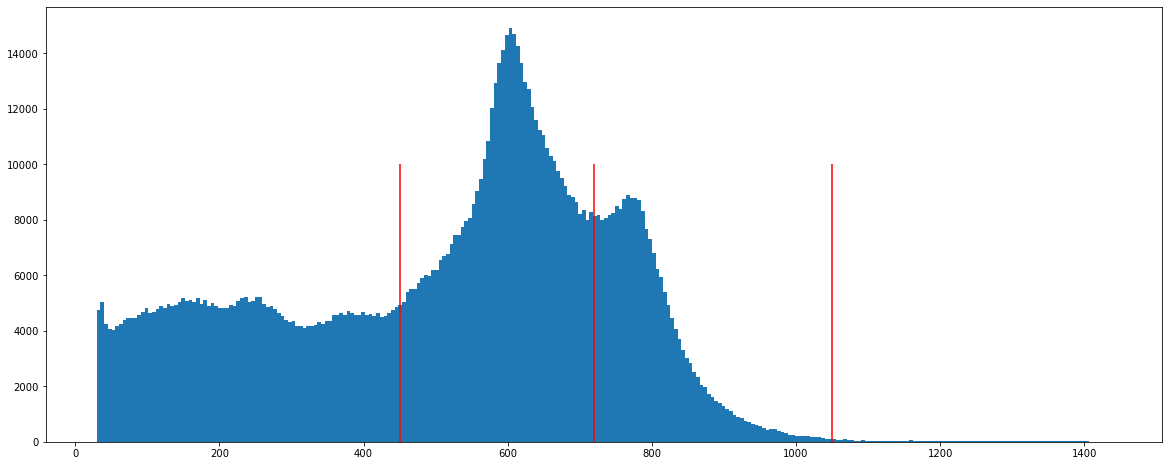

In [106]:
plt.figure(figsize=(20,8))
plt.hist(df_train['time_to_under'], bins=df_train['label'].nunique())
plt.vlines(1050, 0, 10000, colors='red')
plt.vlines(720, 0, 10000, colors='red')
plt.vlines(450, 0, 10000, colors='red')
plt.show()

In [107]:
df_train_corr = df_train.corr()
df_train_corr

,entrance_id,station_id,line_id,time_to_under,label,dayofweek,hour,minute,second
entrance_id,1.000000,0.368080,0.368037,-0.002029,0.107758,-0.007107,-0.013729,0.006162,-0.000384
station_id,0.368080,1.000000,1.000000,0.001836,0.193639,-0.003839,-0.008044,-0.000129,-0.000077
line_id,0.368037,1.000000,1.000000,0.001838,0.193630,-0.003838,-0.008046,-0.000130,-0.000078
time_to_under,-0.002029,0.001836,0.001838,1.000000,0.033850,-0.151724,-0.678177,-0.004656,0.000126
label,0.107758,0.193639,0.193630,0.033850,1.000000,-0.002405,-0.031774,0.000795,0.000238
dayofweek,-0.007107,-0.003839,-0.003838,-0.151724,-0.002405,1.000000,0.149860,0.002206,-0.000856
hour,-0.013729,-0.008044,-0.008046,-0.678177,-0.031774,0.149860,1.000000,-0.080394,-0.001485
minute,0.006162,-0.000129,-0.000130,-0.004656,0.000795,0.002206,-0.080394,1.000000,-0.001276
second,-0.000384,-0.000077,-0.000078,0.000126,0.000238,-0.000856,-0.001485,-0.001276,1.000000


C:\Users\rus_k\AppData\Local\Temp\ipykernel_6040\4239250171.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))


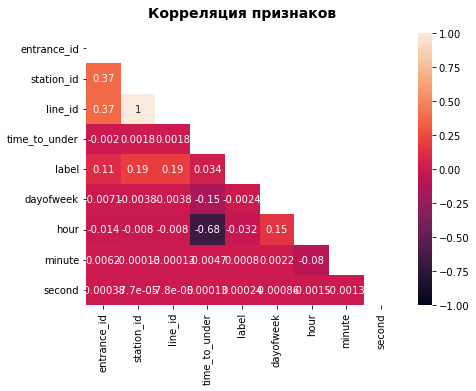

In [108]:
plt.figure(figsize=(7, 5))
mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))
df_train_corr_heatmap = sns.heatmap(df_train_corr, mask=mask, vmin=-1, vmax=1, annot=True)
df_train_corr_heatmap.set_title('Корреляция признаков', fontweight='bold', fontdict={'fontsize':14}, pad=16)
plt.show()

In [110]:
df_train[['station_id', 'line_id']].sort_values(by='station_id').drop_duplicates()

,station_id,line_id
id,,
757912,1002,1
745083,1003,1
1070596,1004,1
905757,1005,1
420000,1006,1
...,...,...
1073868,81012,81
272233,81013,81
300644,81014,81


In [111]:
df_train['station_id_line'] = df_train['station_id'].apply(lambda x: int(str(x)[:-3]))

In [112]:
(df_train['station_id_line'] == df_train['line_id']).sum(), df_train.shape[0]

(1091021, 1091021)

In [113]:
df_test_corr = df_test.corr()
df_test_corr

,entrance_id,station_id,line_id
entrance_id,1.000000,0.370625,0.370582
station_id,0.370625,1.000000,1.000000
line_id,0.370582,1.000000,1.000000


C:\Users\rus_k\AppData\Local\Temp\ipykernel_6040\1774877624.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_test_corr, dtype=np.bool))


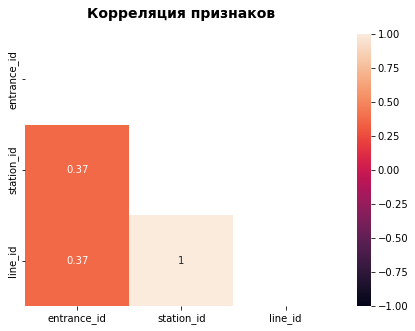

In [114]:
plt.figure(figsize=(7, 5))
mask = np.triu(np.ones_like(df_test_corr, dtype=np.bool))
df_train_corr_heatmap = sns.heatmap(df_test_corr, mask=mask, vmin=-1, vmax=1, annot=True)
df_train_corr_heatmap.set_title('Корреляция признаков', fontweight='bold', fontdict={'fontsize':14}, pad=16)
plt.show()

In [115]:
df_train['station_id_line'] = df_train['station_id'].apply(lambda x: int(str(x)[-3:]))

In [116]:
df_train_corr = df_train.corr()
df_train_corr

,entrance_id,station_id,line_id,time_to_under,label,dayofweek,hour,minute,second,station_id_line
entrance_id,1.000000,0.368080,0.368037,-0.002029,0.107758,-0.007107,-0.013729,0.006162,-0.000384,0.061627
station_id,0.368080,1.000000,1.000000,0.001836,0.193639,-0.003839,-0.008044,-0.000129,-0.000077,-0.034443
line_id,0.368037,1.000000,1.000000,0.001838,0.193630,-0.003838,-0.008046,-0.000130,-0.000078,-0.035014
time_to_under,-0.002029,0.001836,0.001838,1.000000,0.033850,-0.151724,-0.678177,-0.004656,0.000126,-0.003336
label,0.107758,0.193639,0.193630,0.033850,1.000000,-0.002405,-0.031774,0.000795,0.000238,0.007900
dayofweek,-0.007107,-0.003839,-0.003838,-0.151724,-0.002405,1.000000,0.149860,0.002206,-0.000856,-0.002281
hour,-0.013729,-0.008044,-0.008046,-0.678177,-0.031774,0.149860,1.000000,-0.080394,-0.001485,0.004069
minute,0.006162,-0.000129,-0.000130,-0.004656,0.000795,0.002206,-0.080394,1.000000,-0.001276,0.001039
second,-0.000384,-0.000077,-0.000078,0.000126,0.000238,-0.000856,-0.001485,-0.001276,1.000000,0.001594
station_id_line,0.061627,-0.034443,-0.035014,-0.003336,0.007900,-0.002281,0.004069,0.001039,0.001594,1.000000


C:\Users\rus_k\AppData\Local\Temp\ipykernel_6040\4239250171.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))


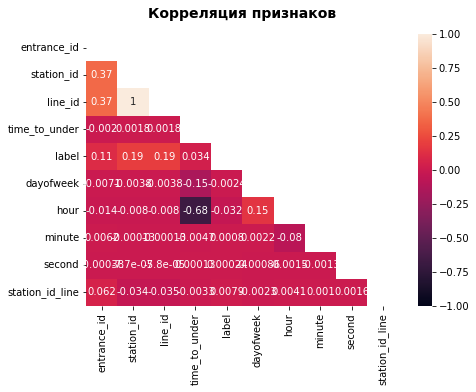

In [117]:
plt.figure(figsize=(7, 5))
mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))
df_train_corr_heatmap = sns.heatmap(df_train_corr, mask=mask, vmin=-1, vmax=1, annot=True)
df_train_corr_heatmap.set_title('Корреляция признаков', fontweight='bold', fontdict={'fontsize':14}, pad=16)
plt.show()

In [118]:
df_train['station_id_line'].nunique()

31

In [119]:
df_train[['station_id', 'station_nm', 'line_id', 'line_nm']].sort_values(by='station_id').drop_duplicates()[:50]

,station_id,station_nm,line_id,line_nm
id,,,,
757912,1002,Бульвар Рокоссовского,1,Сокольническая
745083,1003,Воробьёвы горы,1,Сокольническая
1070596,1004,Комсомольская,1,Сокольническая
905757,1005,Красносельская,1,Сокольническая
420000,1006,Красные Ворота,1,Сокольническая
770384,1007,Кропоткинская,1,Сокольническая
291930,1008,Лубянка,1,Сокольническая
836002,1009,Охотный ряд,1,Сокольническая
967928,1011,Преображенская площадь,1,Сокольническая


In [120]:
line_station_count = df_train.groupby('line_nm')['station_nm'].nunique()
line_station_count

line_nm
Арбатско-Покровская              22
Большая кольцевая                21
Бутовская                         6
Замоскворецкая                   22
Калининская                       8
Калужско-Рижская                 23
Кольцевая                        12
Люблинско-Дмитровская            23
Монорельс                         6
Московское центральное кольцо    31
Некрасовская                      8
Серпуховско-Тимирязевская        24
Сокольническая                   24
Солнцевская                      12
Таганско-Краснопресненская       22
Филёвская                        12
Name: station_nm, dtype: int64

In [121]:
line_station_count_dict = dict(zip(line_station_count.index, line_station_count.values))
line_station_count_dict

{'Арбатско-Покровская': 22,
 'Большая кольцевая': 21,
 'Бутовская': 6,
 'Замоскворецкая': 22,
 'Калининская': 8,
 'Калужско-Рижская': 23,
 'Кольцевая': 12,
 'Люблинско-Дмитровская': 23,
 'Монорельс': 6,
 'Московское центральное кольцо': 31,
 'Некрасовская': 8,
 'Серпуховско-Тимирязевская': 24,
 'Сокольническая': 24,
 'Солнцевская': 12,
 'Таганско-Краснопресненская': 22,
 'Филёвская': 12}

In [122]:
df_train['line_station_count'] = df_train['line_nm'].map(line_station_count_dict)

In [123]:
df_test['line_station_count'] = df_test['line_nm'].map(line_station_count_dict)

In [124]:
station_entrance_count = df_train.groupby('station_nm')['entrance_nm'].nunique()

In [125]:
station_entrance_count_dict = dict(zip(station_entrance_count.index, station_entrance_count.values))
station_entrance_count_dict

{'Авиамоторная': 2,
 'Автозаводская': 3,
 'Академическая': 2,
 'Александровский сад': 2,
 'Алексеевская': 1,
 'Алма-Атинская': 2,
 'Алтуфьево': 2,
 'Аминьевская': 2,
 'Андроновка': 1,
 'Аннино': 2,
 'Арбатская': 2,
 'Аэропорт': 2,
 'Бабушкинская': 2,
 'Багратионовская': 2,
 'Балтийская': 1,
 'Баррикадная': 1,
 'Бауманская': 1,
 'Беговая': 2,
 'Белокаменная': 1,
 'Беломорская': 1,
 'Белорусская': 3,
 'Беляево': 2,
 'Бибирево': 2,
 'Битцевский парк': 1,
 'Борисово': 2,
 'Боровицкая': 1,
 'Боровское шоссе': 2,
 'Ботанический сад': 3,
 'Братиславская': 2,
 'Бульвар Адмирала Ушакова': 1,
 'Бульвар Дмитрия Донского': 2,
 'Бульвар Рокоссовского': 3,
 'Бунинская аллея': 1,
 'Бутырская': 2,
 'ВДНХ': 2,
 'Верхние Котлы': 1,
 'Верхние Лихоборы': 2,
 'Владыкино': 3,
 'Водный стадион': 2,
 'Войковская': 2,
 'Волгоградский проспект': 2,
 'Волжская': 2,
 'Волоколамская': 2,
 'Воробьёвы горы': 2,
 'Воронцовская': 2,
 'Выставочная': 2,
 'Выставочный центр': 1,
 'Выхино': 3,
 'Говорово': 1,
 'Давыдково'

In [126]:
df_train['station_entrance_count'] = df_train['station_nm'].map(station_entrance_count_dict)

In [127]:
df_test['station_entrance_count'] = df_test['station_nm'].map(station_entrance_count_dict)

In [128]:
#df_train.drop(columns=['line_id', 'line_nm', 'station_id_line'], inplace=True)

In [129]:
#df_test.drop(columns=['line_id', 'line_nm'], inplace=True)

In [130]:
df_train.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,dayofweek,time,hour,minute,second,day,station_id_line,line_station_count,station_entrance_count
id,,,,,,,,,,,,,,,,,,,,
1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001,0,05:00:13,5,0,13,2022-09-12,7,21,1
2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011,0,05:00:54,5,0,54,2022-09-12,6,22,2
3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022,0,05:00:55,5,0,55,2022-09-12,6,22,2
4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022,0,05:01:13,5,1,13,2022-09-12,6,22,2
5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017,0,05:02:55,5,2,55,2022-09-12,6,22,2


In [131]:
df_train['station_id'].nunique()

276

In [132]:
df_train['entrance_id'].nunique()

426

In [133]:
df_train.sort_values(by=['entrance_id', 'station_id', 'label', 'time_to_under'])[:50]

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,dayofweek,time,hour,minute,second,day,station_id_line,line_station_count,station_entrance_count
id,,,,,,,,,,,,,,,,,,,,
338336,C7055A1F36EF95646A589F093E2A735F,Пропуск FacePay,20,Бульвар Рокоссовского (Северный),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-14 00:14:04,59.400000,1002,2,00:14:04,0,14,4,2022-09-14,2,24,3
339686,78FFA9E0AEBE195F38A66CB3C85896DA,Пропуск FacePay,20,Бульвар Рокоссовского (Северный),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-14 03:22:58,134.033333,1002,2,03:22:58,3,22,58,2022-09-14,2,24,3
504072,07AB3641F677559C81B2980D8A63C804,Социальная карта москвича,20,Бульвар Рокоссовского (Северный),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-14 18:49:35,152.700000,1002,2,18:49:35,18,49,35,2022-09-14,2,24,3
339791,9AC8CAA8890390233888AFDCFE04E0FF,Пропуск FacePay,20,Бульвар Рокоссовского (Северный),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-14 05:07:07,158.700000,1002,2,05:07:07,5,7,7,2022-09-14,2,24,3
682783,2A6A5D51D4BCB8F301642C9D411FB109,Социальная карта москвича,20,Бульвар Рокоссовского (Северный),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-16 06:19:07,166.383333,1002,4,06:19:07,6,19,7,2022-09-16,2,24,3
8821,2A6A5D51D4BCB8F301642C9D411FB109,Социальная карта москвича,20,Бульвар Рокоссовского (Северный),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-12 06:21:21,172.000000,1002,0,06:21:21,6,21,21,2022-09-12,2,24,3
55151,0850043832CEC0AE656B1E5A7E747704,Пропуск FacePay,20,Бульвар Рокоссовского (Северный),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-12 07:55:07,273.100000,1002,0,07:55:07,7,55,7,2022-09-12,2,24,3
910960,560B2A17AB04E13BD7EBCA8AA05F1C75,СК учащегося 30 дней,20,Бульвар Рокоссовского (Северный),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-17 10:26:22,394.533333,1002,5,10:26:22,10,26,22,2022-09-17,2,24,3
480076,001D6C65BA6BAEB296E3BA8F9CCF057D,Социальная карта москвича,20,Бульвар Рокоссовского (Северный),1002,Бульвар Рокоссовского,1,Сокольническая,2022-09-14 11:59:53,511.816667,1002,2,11:59:53,11,59,53,2022-09-14,2,24,3


In [134]:
df_train['pass_dttm'].dtype

dtype('<M8[ns]')

In [135]:
df_train['pass_dttm'] = pd.to_datetime(df_train['pass_dttm'])

In [136]:
df_test['pass_dttm'] = pd.to_datetime(df_test['pass_dttm'])

In [137]:
df_train['dayofweek'] = df_train['pass_dttm'].dt.dayofweek

In [138]:
df_test['dayofweek'] = df_test['pass_dttm'].dt.dayofweek

In [139]:
df_train['hour'] = df_train['pass_dttm'].dt.hour

In [140]:
df_test['hour'] = df_test['pass_dttm'].dt.hour

In [141]:
df_train['minute'] = df_train['pass_dttm'].dt.minute

In [142]:
df_test['minute'] = df_test['pass_dttm'].dt.minute

In [143]:
df_train['second'] = df_train['pass_dttm'].dt.second

In [144]:
df_test['second'] = df_test['pass_dttm'].dt.second

In [145]:
df_train['minutes'] = df_train['hour'] * 60 + df_train['minute'] + df_train['second'] // 30

In [146]:
df_test['minutes'] = df_test['hour'] * 60 + df_test['minute'] + df_test['second'] // 30

In [147]:
def is_work_day(week):
    
    if week in [5, 6]:
        return 0
    else:
        return 1

In [148]:
df_train['workday'] = df_train['dayofweek'].apply(lambda x: is_work_day(x))

In [149]:
df_test['workday'] = df_test['dayofweek'].apply(lambda x: is_work_day(x))

In [150]:
df_train_corr = df_train.corr()
df_train_corr

,entrance_id,station_id,line_id,time_to_under,label,dayofweek,hour,minute,second,station_id_line,line_station_count,station_entrance_count,minutes,workday
entrance_id,1.000000,0.368080,0.368037,-0.002029,0.107758,-0.007107,-0.013729,0.006162,-0.000384,0.061627,-0.137736,-0.087852,-0.013254,0.007633
station_id,0.368080,1.000000,1.000000,0.001836,0.193639,-0.003839,-0.008044,-0.000129,-0.000077,-0.034443,-0.287353,-0.037532,-0.008082,0.004083
line_id,0.368037,1.000000,1.000000,0.001838,0.193630,-0.003838,-0.008046,-0.000130,-0.000078,-0.035014,-0.287575,-0.037430,-0.008085,0.004082
time_to_under,-0.002029,0.001836,0.001838,1.000000,0.033850,-0.151724,-0.678177,-0.004656,0.000126,-0.003336,0.001274,0.007218,-0.680767,0.186933
label,0.107758,0.193639,0.193630,0.033850,1.000000,-0.002405,-0.031774,0.000795,0.000238,0.007900,-0.021279,-0.008937,-0.031807,0.002810
dayofweek,-0.007107,-0.003839,-0.003838,-0.151724,-0.002405,1.000000,0.149860,0.002206,-0.000856,-0.002281,-0.000277,-0.002268,0.150532,-0.762738
hour,-0.013729,-0.008044,-0.008046,-0.678177,-0.031774,0.149860,1.000000,-0.080394,-0.001485,0.004069,0.002659,-0.005207,0.996421,-0.197158
minute,0.006162,-0.000129,-0.000130,-0.004656,0.000795,0.002206,-0.080394,1.000000,-0.001276,0.001039,-0.000379,0.001787,0.004108,-0.001759
second,-0.000384,-0.000077,-0.000078,0.000126,0.000238,-0.000856,-0.001485,-0.001276,1.000000,0.001594,0.000595,0.000492,0.000537,0.001196
station_id_line,0.061627,-0.034443,-0.035014,-0.003336,0.007900,-0.002281,0.004069,0.001039,0.001594,1.000000,0.398272,-0.176271,0.004175,0.001640


C:\Users\rus_k\AppData\Local\Temp\ipykernel_6040\2680733534.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))


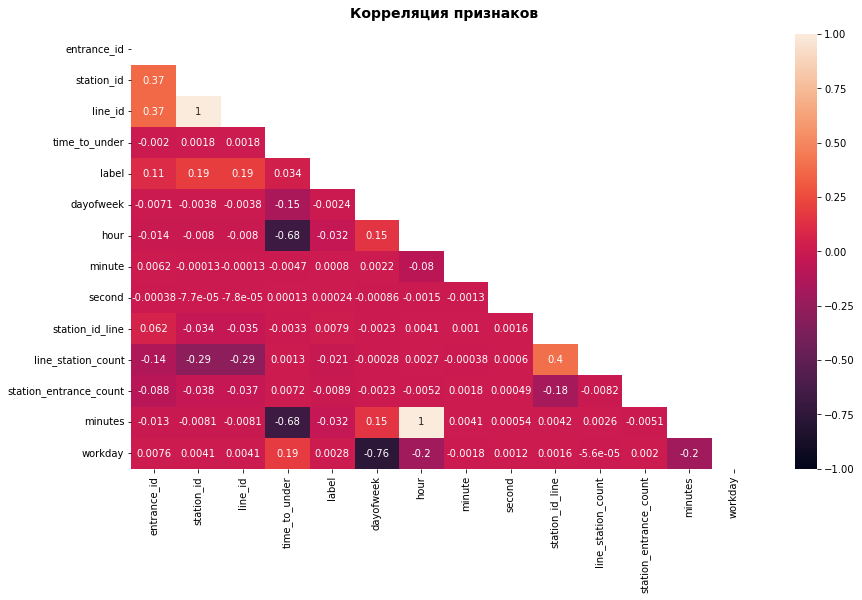

In [151]:
plt.figure(figsize=(14, 8))
mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))
df_train_corr_heatmap = sns.heatmap(df_train_corr, mask=mask, vmin=-1, vmax=1, annot=True)
df_train_corr_heatmap.set_title('Корреляция признаков', fontweight='bold', fontdict={'fontsize':14}, pad=16)
plt.show()

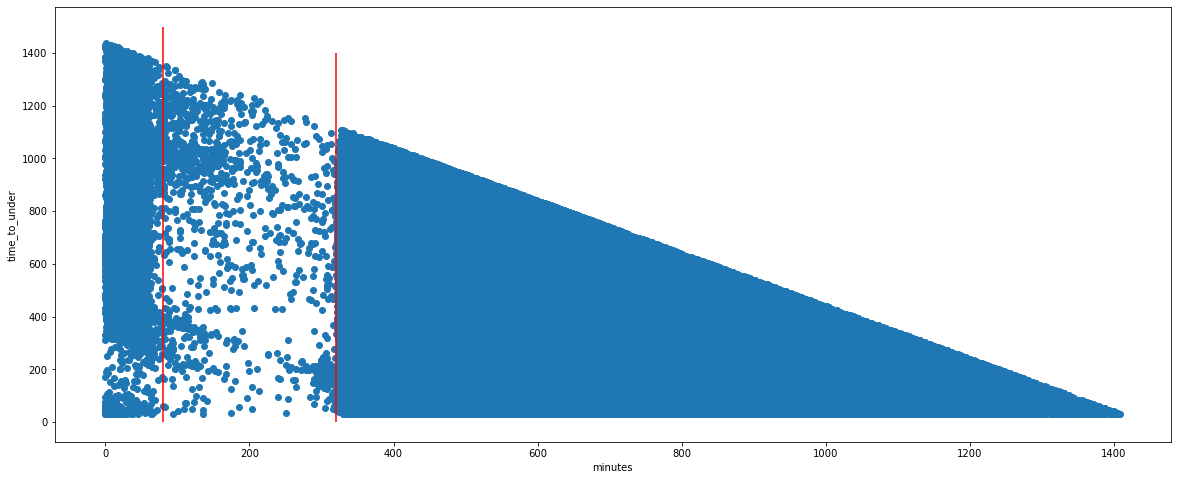

In [152]:
plt.figure(figsize=(20, 8))
plt.scatter(df_train['minutes'], df_train['time_to_under'])
plt.xlabel('minutes')
plt.ylabel('time_to_under')
plt.vlines(320, 0, 1400, colors='red')
plt.vlines(80, 0, 1500, colors='red')
plt.show()

In [153]:
def minutes_type(data):
    if data < 80:
        return 0
    elif data < 320:
        return 1
    else:
        return 2

In [154]:
df_train['minutes_type'] = df_train['minutes'].apply(lambda x: minutes_type(x))

In [155]:
df_test['minutes_type'] = df_test['minutes'].apply(lambda x: minutes_type(x))

In [156]:
df_train.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,...,hour,minute,second,day,station_id_line,line_station_count,station_entrance_count,minutes,workday,minutes_type
id,,,,,,,,,,,,,,,,,,,,,
1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,...,5,0,13,2022-09-12,7,21,1,300,1,1
2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,...,5,0,54,2022-09-12,6,22,2,301,1,1
3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,...,5,0,55,2022-09-12,6,22,2,301,1,1
4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,...,5,1,13,2022-09-12,6,22,2,301,1,1
5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,...,5,2,55,2022-09-12,6,22,2,303,1,1


In [157]:
df_train['pass_dttm'].agg(['min', 'max'])

min   2022-09-12 05:00:13
max   2022-09-19 04:10:42
Name: pass_dttm, dtype: datetime64[ns]

In [158]:
df_test['pass_dttm'].agg(['min', 'max'])

min   2022-09-12 05:00:03
max   2022-09-19 03:13:27
Name: pass_dttm, dtype: datetime64[ns]

In [159]:
df_train_corr = df_train.corr()
df_train_corr

,entrance_id,station_id,line_id,time_to_under,label,dayofweek,hour,minute,second,station_id_line,line_station_count,station_entrance_count,minutes,workday,minutes_type
entrance_id,1.000000,0.368080,0.368037,-0.002029,0.107758,-0.007107,-0.013729,0.006162,-0.000384,0.061627,-0.137736,-0.087852,-0.013254,0.007633,0.029910
station_id,0.368080,1.000000,1.000000,0.001836,0.193639,-0.003839,-0.008044,-0.000129,-0.000077,-0.034443,-0.287353,-0.037532,-0.008082,0.004083,0.009007
line_id,0.368037,1.000000,1.000000,0.001838,0.193630,-0.003838,-0.008046,-0.000130,-0.000078,-0.035014,-0.287575,-0.037430,-0.008085,0.004082,0.009000
time_to_under,-0.002029,0.001836,0.001838,1.000000,0.033850,-0.151724,-0.678177,-0.004656,0.000126,-0.003336,0.001274,0.007218,-0.680767,0.186933,-0.104570
label,0.107758,0.193639,0.193630,0.033850,1.000000,-0.002405,-0.031774,0.000795,0.000238,0.007900,-0.021279,-0.008937,-0.031807,0.002810,-0.003752
dayofweek,-0.007107,-0.003839,-0.003838,-0.151724,-0.002405,1.000000,0.149860,0.002206,-0.000856,-0.002281,-0.000277,-0.002268,0.150532,-0.762738,-0.044177
hour,-0.013729,-0.008044,-0.008046,-0.678177,-0.031774,0.149860,1.000000,-0.080394,-0.001485,0.004069,0.002659,-0.005207,0.996421,-0.197158,0.261403
minute,0.006162,-0.000129,-0.000130,-0.004656,0.000795,0.002206,-0.080394,1.000000,-0.001276,0.001039,-0.000379,0.001787,0.004108,-0.001759,0.029146
second,-0.000384,-0.000077,-0.000078,0.000126,0.000238,-0.000856,-0.001485,-0.001276,1.000000,0.001594,0.000595,0.000492,0.000537,0.001196,-0.000569
station_id_line,0.061627,-0.034443,-0.035014,-0.003336,0.007900,-0.002281,0.004069,0.001039,0.001594,1.000000,0.398272,-0.176271,0.004175,0.001640,0.011547


C:\Users\rus_k\AppData\Local\Temp\ipykernel_6040\2680733534.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))


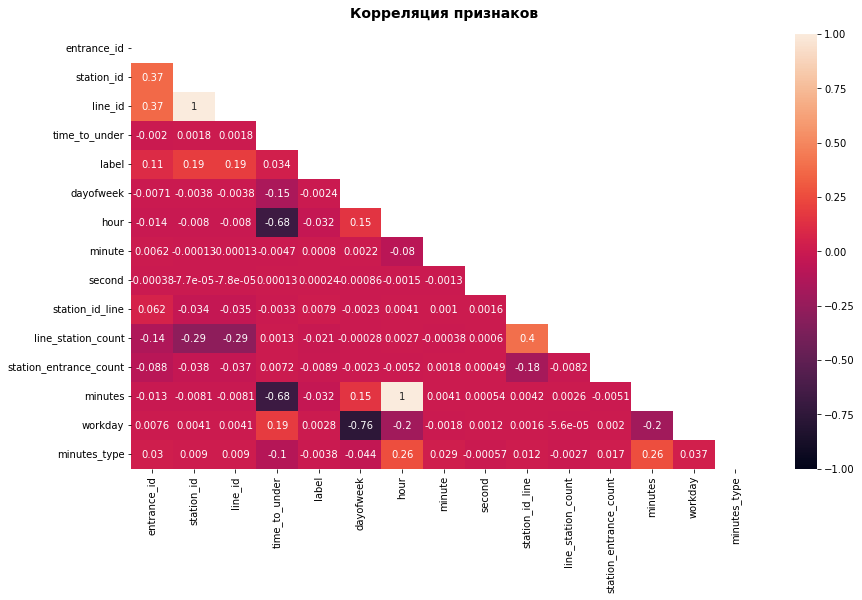

In [160]:
plt.figure(figsize=(14, 8))
mask = np.triu(np.ones_like(df_train_corr, dtype=np.bool))
df_train_corr_heatmap = sns.heatmap(df_train_corr, mask=mask, vmin=-1, vmax=1, annot=True)
df_train_corr_heatmap.set_title('Корреляция признаков', fontweight='bold', fontdict={'fontsize':14}, pad=16)
plt.show()

In [161]:
df_train.head()

,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,...,hour,minute,second,day,station_id_line,line_station_count,station_entrance_count,minutes,workday,minutes_type
id,,,,,,,,,,,,,,,,,,,,,
1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,...,5,0,13,2022-09-12,7,21,1,300,1,1
2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,...,5,0,54,2022-09-12,6,22,2,301,1,1
3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,...,5,0,55,2022-09-12,6,22,2,301,1,1
4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,...,5,1,13,2022-09-12,6,22,2,301,1,1
5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,...,5,2,55,2022-09-12,6,22,2,303,1,1


In [162]:
df_train.dtypes

ticket_id                         object
ticket_type_nm                    object
entrance_id                        int64
entrance_nm                       object
station_id                         int64
station_nm                        object
line_id                            int64
line_nm                           object
pass_dttm                 datetime64[ns]
time_to_under                    float64
label                              int64
dayofweek                          int64
time                              object
hour                               int64
minute                             int64
second                             int64
day                               object
station_id_line                    int64
line_station_count                 int64
station_entrance_count             int64
minutes                            int64
workday                            int64
minutes_type                       int64
dtype: object

In [163]:
df_train['ticket_type_nm'].unique()

array(['Пропуск FacePay', 'СК учащегося 30 дней',
       'БСК дружинника г.Москвы', '30 дней', 'КОШЕЛЕК',
       'СК студента 30 дней', '90 дней', '90 дней ЕДИНЫЙ ТК',
       '30 дней СК учащегося', '90 дней СК студента',
       '30 дней СК студента', 'ББК', 'СК аспиранта 90 дней',
       'Социальная карта москвича', '30 дней ЕДИНЫЙ ТК',
       'Социальная карта жителя Моск. области', '30 дней Пригород ТК',
       'Социальная карта москвича с сопровождающим',
       'Пропуск сотрудника УВД по охране Метрополитена',
       '60 поездок ЕДИНЫЙ ТК', 'СК для сотрудника ГУВД г.Москвы',
       '365 дней ЕДИНЫЙ ТК', 'ВЕСБ МОСКВА (7мин)', 'СК студента 90 дней',
       '90 дней Пригород ТК', '30 дней  Пригород', '365 дней Пригород ТК',
       '365 дней', 'СК ординатора 30 дней', '30 дней СК аспиранта',
       '30 дней СК ординатора', '90 дней СК ординатора',
       'ВЕСБ МО (7 мин)', 'ВЕСБ МО (тип 5)', 'СК ординатора 90 дней',
       'СК аспиранта 30 дней', '90 дней СК учащегося',
       'Времен

In [164]:
df_train['ticket_type_nm'].nunique()

60

In [165]:
df_train['ticket_type_nm'].value_counts()[:30]

КОШЕЛЕК                                       262499
30 дней ЕДИНЫЙ ТК                             177041
Социальная карта москвича                     127022
30 дней                                       117064
90 дней ЕДИНЫЙ ТК                              58071
30 дней СК студента                            48658
60 поездок ЕДИНЫЙ ТК                           46542
30 дней Пригород ТК                            45381
СК студента 30 дней                            39395
ББК                                            29674
30 дней СК учащегося                           24307
365 дней ЕДИНЫЙ ТК                             20859
СК учащегося 30 дней                           16933
Социальная карта жителя Моск. области          15551
90 дней                                        12817
Пропуск FacePay                                 9234
СК студента 90 дней                             6744
СК учащегося 90 дней                            3169
30 дней  Пригород                             

In [166]:
df_train['ticket_type_nm'].value_counts()[-30:]

СК аспиранта 30 дней                                      869
365 дней                                                  768
Пропуск сотрудника УВД по охране Метрополитена            541
СК аспиранта 90 дней                                      510
3 суток Единый ТК                                         504
СК ординатора 90 дней                                     361
ВЕСБ МО (7 мин)                                           335
Социальная карта жителя Моск. области с сопровождающим    244
Ультралайт Единый (70)                                    233
90 дней  Пригород                                         188
Временный билет ММ                                        159
90 дней СК ординатора                                     142
1 сутки ЕДИНЫЙ ТК                                         123
Пропуск сотрудника  метрополитена                         113
Билет 3 суток ЕДИНЫЙ                                      113
90 дней СК аспиранта                                       92
ВЕСБ МО 

In [167]:
data = []
for words in df_train['ticket_type_nm'].drop_duplicates().values:
    for word in words.split():
        if word.lower() not in data and len(word) > 3:
            data.append(word.lower())

In [168]:
data

['пропуск',
 'facepay',
 'учащегося',
 'дней',
 'дружинника',
 'г.москвы',
 'кошелек',
 'студента',
 'единый',
 'аспиранта',
 'социальная',
 'карта',
 'москвича',
 'жителя',
 'моск.',
 'области',
 'пригород',
 'сопровождающим',
 'сотрудника',
 'охране',
 'метрополитена',
 'поездок',
 'гувд',
 'весб',
 'москва',
 '(7мин)',
 'ординатора',
 'мин)',
 '(тип',
 'временный',
 'билет',
 'суток',
 'безналичная',
 'транспортная',
 'сутки',
 'ультралайт',
 '(70)',
 'руководителя',
 'ассистента-стажера']

In [169]:
def ticket_type(name):
    if 'пригород' in name.lower():
        return 'пригород'
    elif 'стажер' in name.lower():
        return 'стажер'
    elif 'студент' in name.lower():
        return 'студент'
    elif 'аспирант' in name.lower():
        return 'аспирант'
    elif 'ординатор' in name.lower():
        return 'ординатор'
    elif 'единый' in name.lower():
        return 'единый'
    elif 'област' in name.lower():
        return 'область'
    elif 'метро' in name.lower():
        return 'метро'
    elif 'пропуск' in name.lower():
        return 'пропуск'
    elif 'весб' in name.lower():
        return 'весб'
    elif 'кошелек' in name.lower():
        return 'кошелек'
    elif 'учащег' in name.lower():
        return 'учащейся'
    elif 'социал' in name.lower():
        return 'социальная'
    elif 'г.москвы' in name.lower():
        return 'полиция'
    elif 'дней' in name.lower():
        return 'единый'
    elif 'транспорт' in name.lower():
        return 'единый'
    else:
        return 'карта'

In [170]:
df_train['ticket_type'] = df_train['ticket_type_nm'].apply(lambda x: ticket_type(x))

In [171]:
df_train['ticket_type'].value_counts()

единый        434197
кошелек       262499
социальная    129294
студент        97332
пригород       52135
учащейся       45958
карта          29839
область        15795
пропуск         9278
полиция         5463
весб            3011
ординатор       2933
аспирант        2516
метро            678
стажер            93
Name: ticket_type, dtype: int64

In [172]:
df_test['ticket_type'] = df_test['ticket_type_nm'].apply(lambda x: ticket_type(x))

In [173]:
df_test['ticket_type'].value_counts()

единый        224093
кошелек       134786
социальная     66437
студент        50112
пригород       26679
учащейся       24076
карта          15281
область         8003
пропуск         4834
полиция         2988
весб            1490
ординатор       1423
аспирант        1302
метро            341
стажер            45
Name: ticket_type, dtype: int64